# Balanced Data

In [1]:
require(MASS)
require(brant)
require(DescTools)
require(ggplot2)
require(jtools)
require(ramify)
require(caret)
require(cowplot)
require(pracma)

Loading required package: MASS

Loading required package: brant

Loading required package: DescTools

Loading required package: ggplot2

Loading required package: jtools


Attaching package: ‘jtools’


The following object is masked from ‘package:DescTools’:

    %nin%


Loading required package: ramify


Attaching package: ‘ramify’


The following object is masked from ‘package:graphics’:

    clip


Loading required package: caret

Loading required package: lattice


Attaching package: ‘caret’


The following objects are masked from ‘package:DescTools’:

    MAE, RMSE


Loading required package: cowplot

Loading required package: pracma


Attaching package: ‘pracma’


The following objects are masked from ‘package:ramify’:

    eye, inv, linspace, logspace, meshgrid, ones, rand, randi, randn,
    repmat, size, tril, triu, zeros


The following objects are masked from ‘package:DescTools’:

    Mode, Rank




In [2]:
crash_data <- read.csv('./datasets/qld_crash_roads.csv')

head(crash_data)

,sp_limit,atmospheric,lighting,road_surface,road_condition,severity
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
1,60,Clear,Daylight,Sealed,Dry,Fatal
2,110,Clear,Daylight,Sealed,Dry,Fatal
3,60,Clear,Daylight,Sealed,Wet,Fatal
4,80,Clear,Dawn/Dusk,Sealed,Dry,Fatal
5,110,Clear,Darkness/Not lighted,Sealed,Dry,Fatal
6,80,Clear,Daylight,Sealed,Dry,Fatal


In [3]:
summary(crash_data)

    sp_limit     atmospheric          lighting         road_surface      
 Min.   : 50.0   Length:3415        Length:3415        Length:3415       
 1st Qu.: 60.0   Class :character   Class :character   Class :character  
 Median : 60.0   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 72.8                                                           
 3rd Qu.: 80.0                                                           
 Max.   :110.0                                                           
 road_condition       severity        
 Length:3415        Length:3415       
 Class :character   Class :character  
 Mode  :character   Mode  :character  
                                      
                                      
                                      

### Data Preparation - Nominal

In [4]:
crash_data$atmospheric <- factor(crash_data$atmospheric, ordered = FALSE)

crash_data$road_surface <- factor(crash_data$road_surface, ordered=FALSE)

crash_data$road_condition <- factor(crash_data$road_condition, ordered=FALSE)

crash_data$lighting <- factor(crash_data$lighting, ordered = FALSE)



# Ordinal Variable
crash_data$severity <- factor(crash_data$severity, ordered = TRUE,
                                    levels = c("Minor injury",
                                               "Medical treatment",
                                               "Hospitalisation",
                                               "Fatal"))

In [5]:
# ordinal variable distribution

table(crash_data$severity)


     Minor injury Medical treatment   Hospitalisation             Fatal 
              778               788               919               930 

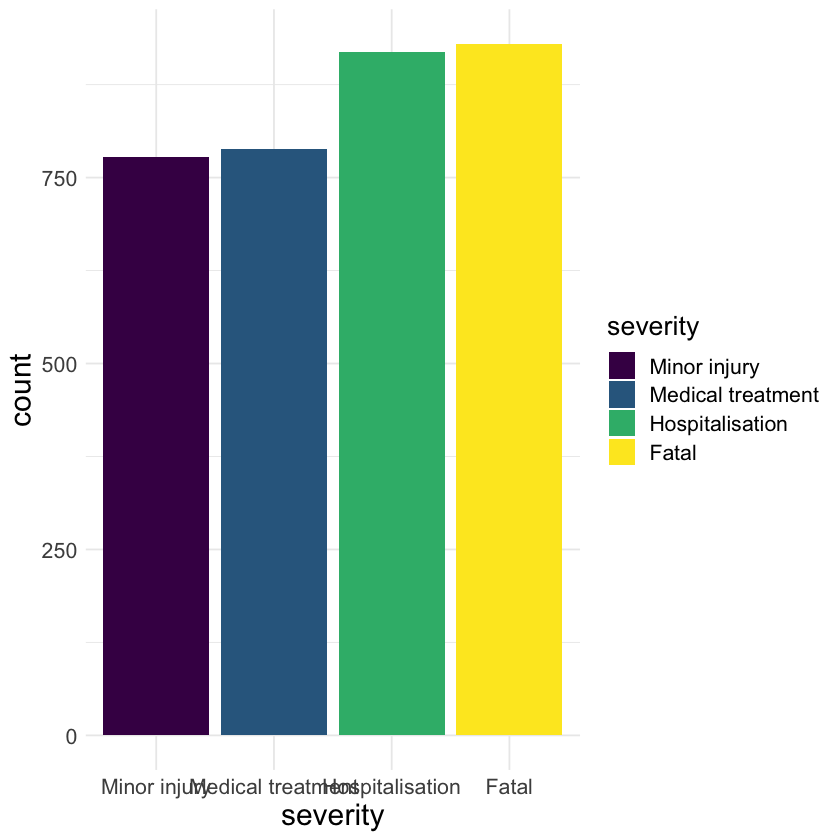

In [6]:
sev <- ggplot(crash_data, aes(x = severity, fill = severity)) +
    geom_bar() +
    theme_minimal() +
    theme(
          text = element_text(size = 16),  # Increase the overall text size
          plot.title = element_text(size = 18),  # Increase the title font size
          axis.title.x = element_text(size = 18),  # Increase the x-axis label font size
          axis.title.y = element_text(size = 18)  # Increase the y-axis label font size
        )

print(sev)

In [7]:
ggsave("sev_plot.png", plot = sev, width = 20, height = 10, dpi = 300)

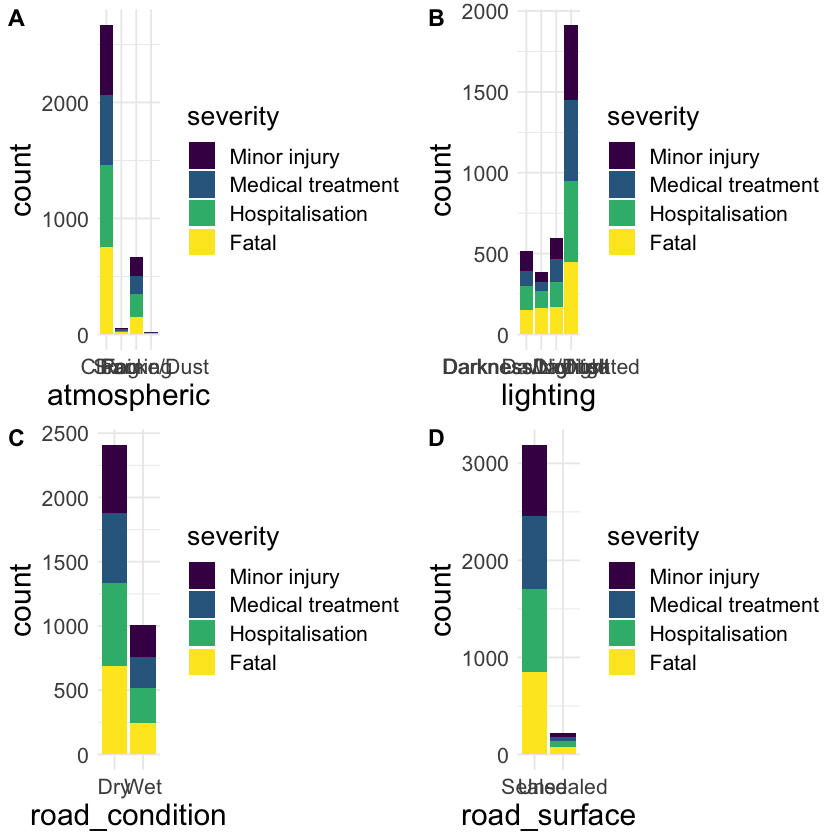

In [8]:
atmo <- ggplot(crash_data, aes(x = atmospheric, fill = severity)) +
    geom_bar() +
    theme_minimal() +
    theme(
          text = element_text(size = 16),  # Increase the overall text size
          plot.title = element_text(size = 18),  # Increase the title font size
          axis.title.x = element_text(size = 18),  # Increase the x-axis label font size
          axis.title.y = element_text(size = 18)  # Increase the y-axis label font size
        )

light <- ggplot(crash_data, aes(x = lighting, fill = severity)) +
    geom_bar() +
    theme_minimal()  +
    theme(
          text = element_text(size = 16),  # Increase the overall text size
          plot.title = element_text(size = 18),  # Increase the title font size
          axis.title.x = element_text(size = 18),  # Increase the x-axis label font size
          axis.title.y = element_text(size = 18)  # Increase the y-axis label font size
        )

road_cond <- ggplot(crash_data, aes(x = road_condition, fill = severity)) +
    geom_bar() +
    theme_minimal() +
    theme(
          text = element_text(size = 16),  # Increase the overall text size
          plot.title = element_text(size = 18),  # Increase the title font size
          axis.title.x = element_text(size = 18),  # Increase the x-axis label font size
          axis.title.y = element_text(size = 18)  # Increase the y-axis label font size
        )

road_surf <- ggplot(crash_data, aes(x = road_surface, fill = severity)) +
    geom_bar() +
    theme_minimal() +
    theme(
          text = element_text(size = 16),  # Increase the overall text size
          plot.title = element_text(size = 18),  # Increase the title font size
          axis.title.x = element_text(size = 18),  # Increase the x-axis label font size
          axis.title.y = element_text(size = 18)  # Increase the y-axis label font size
        )

features_plot <- cowplot::plot_grid(atmo, light, road_cond, road_surf, labels = "AUTO", ncol = 2)
                            

print(features_plot)
options(repr.plot.width=20, repr.plot.height=10)

In [9]:
ggsave("features_plot.png", plot = features_plot, width = 20, height = 10, dpi = 300)

### Model Training

In [10]:
set.seed(56)

# shuffle dataset before split
crash_data <- crash_data[sample(1:nrow(crash_data)), ] 

#use 80% of dataset as training set and 20% as test set
set.seed(56)
dt <- sample(1:nrow(crash_data), size = round(0.8*nrow(crash_data)))

train  <- crash_data[dt, ]
test   <- crash_data[-dt, ]

In [11]:
nrow(train)

[1] 2732

In [12]:
nrow(test)

[1] 683

In [13]:
# Multinomial model
msev <- nnet::multinom(severity ~ ., data=train)

# weights:  44 (30 variable)
initial  value 3787.356195 
iter  10 value 3738.361512
iter  20 value 3720.188261
iter  30 value 3719.326781
final  value 3719.322007 
converged


In [14]:
logLik(msev)

'log Lik.' -3719.322 (df=30)

### Cross Validation

In [15]:
#set.seed(1)

# Perform 5-fold Cross Validation
#ctrl <- trainControl(method = "cv", number = 5)

#cv_results <- train(severity ~ sp_limit + atmospheric + lighting + road_surface + road_condition,
                   # data = train, method = "polr", trControl = ctrl)

#print(cv_results)

In [16]:
mpolr <- polr(severity ~ sp_limit
             + atmospheric
             + lighting
             + road_surface
             + road_condition, data=train)

In [17]:
summary(mpolr)


Re-fitting to get Hessian




Call:
polr(formula = severity ~ sp_limit + atmospheric + lighting + 
    road_surface + road_condition, data = train)

Coefficients:
                                 Value Std. Error t value
sp_limit                      0.008369   0.001684  4.9712
atmosphericFog               -0.132914   0.293466 -0.4529
atmosphericRaining           -0.024329   0.136029 -0.1788
atmosphericSmoke/Dust        -0.154476   0.459189 -0.3364
lightingDarkness/Not lighted  0.386550   0.139554  2.7699
lightingDawn/Dusk            -0.098364   0.122935 -0.8001
lightingDaylight             -0.305808   0.101863 -3.0022
road_surfaceUnsealed          0.467314   0.142043  3.2899
road_conditionWet            -0.145615   0.118275 -1.2312

Intercepts:
                                  Value   Std. Error t value
Minor injury|Medical treatment    -0.8024  0.1475    -5.4399
Medical treatment|Hospitalisation  0.2457  0.1461     1.6816
Hospitalisation|Fatal              1.4699  0.1488     9.8773

Residual Deviance: 7460.221 


In [18]:
ctable <- coef(summary(mpolr, digits = 3))

p <- pnorm(abs(ctable[, "t value"]), lower.tail = FALSE) * 2

## combined table
ctable <- cbind(ctable, "p value" = p)

ctable


Re-fitting to get Hessian




,Value,Std. Error,t value,p value
sp_limit,0.008369325,0.001683569,4.9711792,6.654690e-07
atmosphericFog,-0.132914223,0.293466282,-0.4529114,6.506125e-01
atmosphericRaining,-0.024328754,0.136028826,-0.1788500,8.580555e-01
atmosphericSmoke/Dust,-0.154476014,0.459188883,-0.3364106,7.365612e-01
lightingDarkness/Not lighted,0.386549702,0.139553771,2.7698979,5.607386e-03
lightingDawn/Dusk,-0.098364230,0.122935464,-0.8001290,4.236361e-01
lightingDaylight,-0.305808245,0.101862863,-3.0021564,2.680744e-03
road_surfaceUnsealed,0.467314457,0.142043427,3.2899407,1.002085e-03
road_conditionWet,-0.145614897,0.118275237,-1.2311529,2.182657e-01
Minor injury|Medical treatment,-0.802447616,0.147510615,-5.4399313,5.330111e-08


In [19]:
intercepts <- ctable[10:12, 1]

inter <- as.data.frame(intercepts)

inter

,intercepts
,<dbl>
Minor injury|Medical treatment,-0.8024476
Medical treatment|Hospitalisation,0.2457496
Hospitalisation|Fatal,1.4698603


In [20]:
rownames(inter)

[1] "Minor injury|Medical treatment"    "Medical treatment|Hospitalisation"
[3] "Hospitalisation|Fatal"

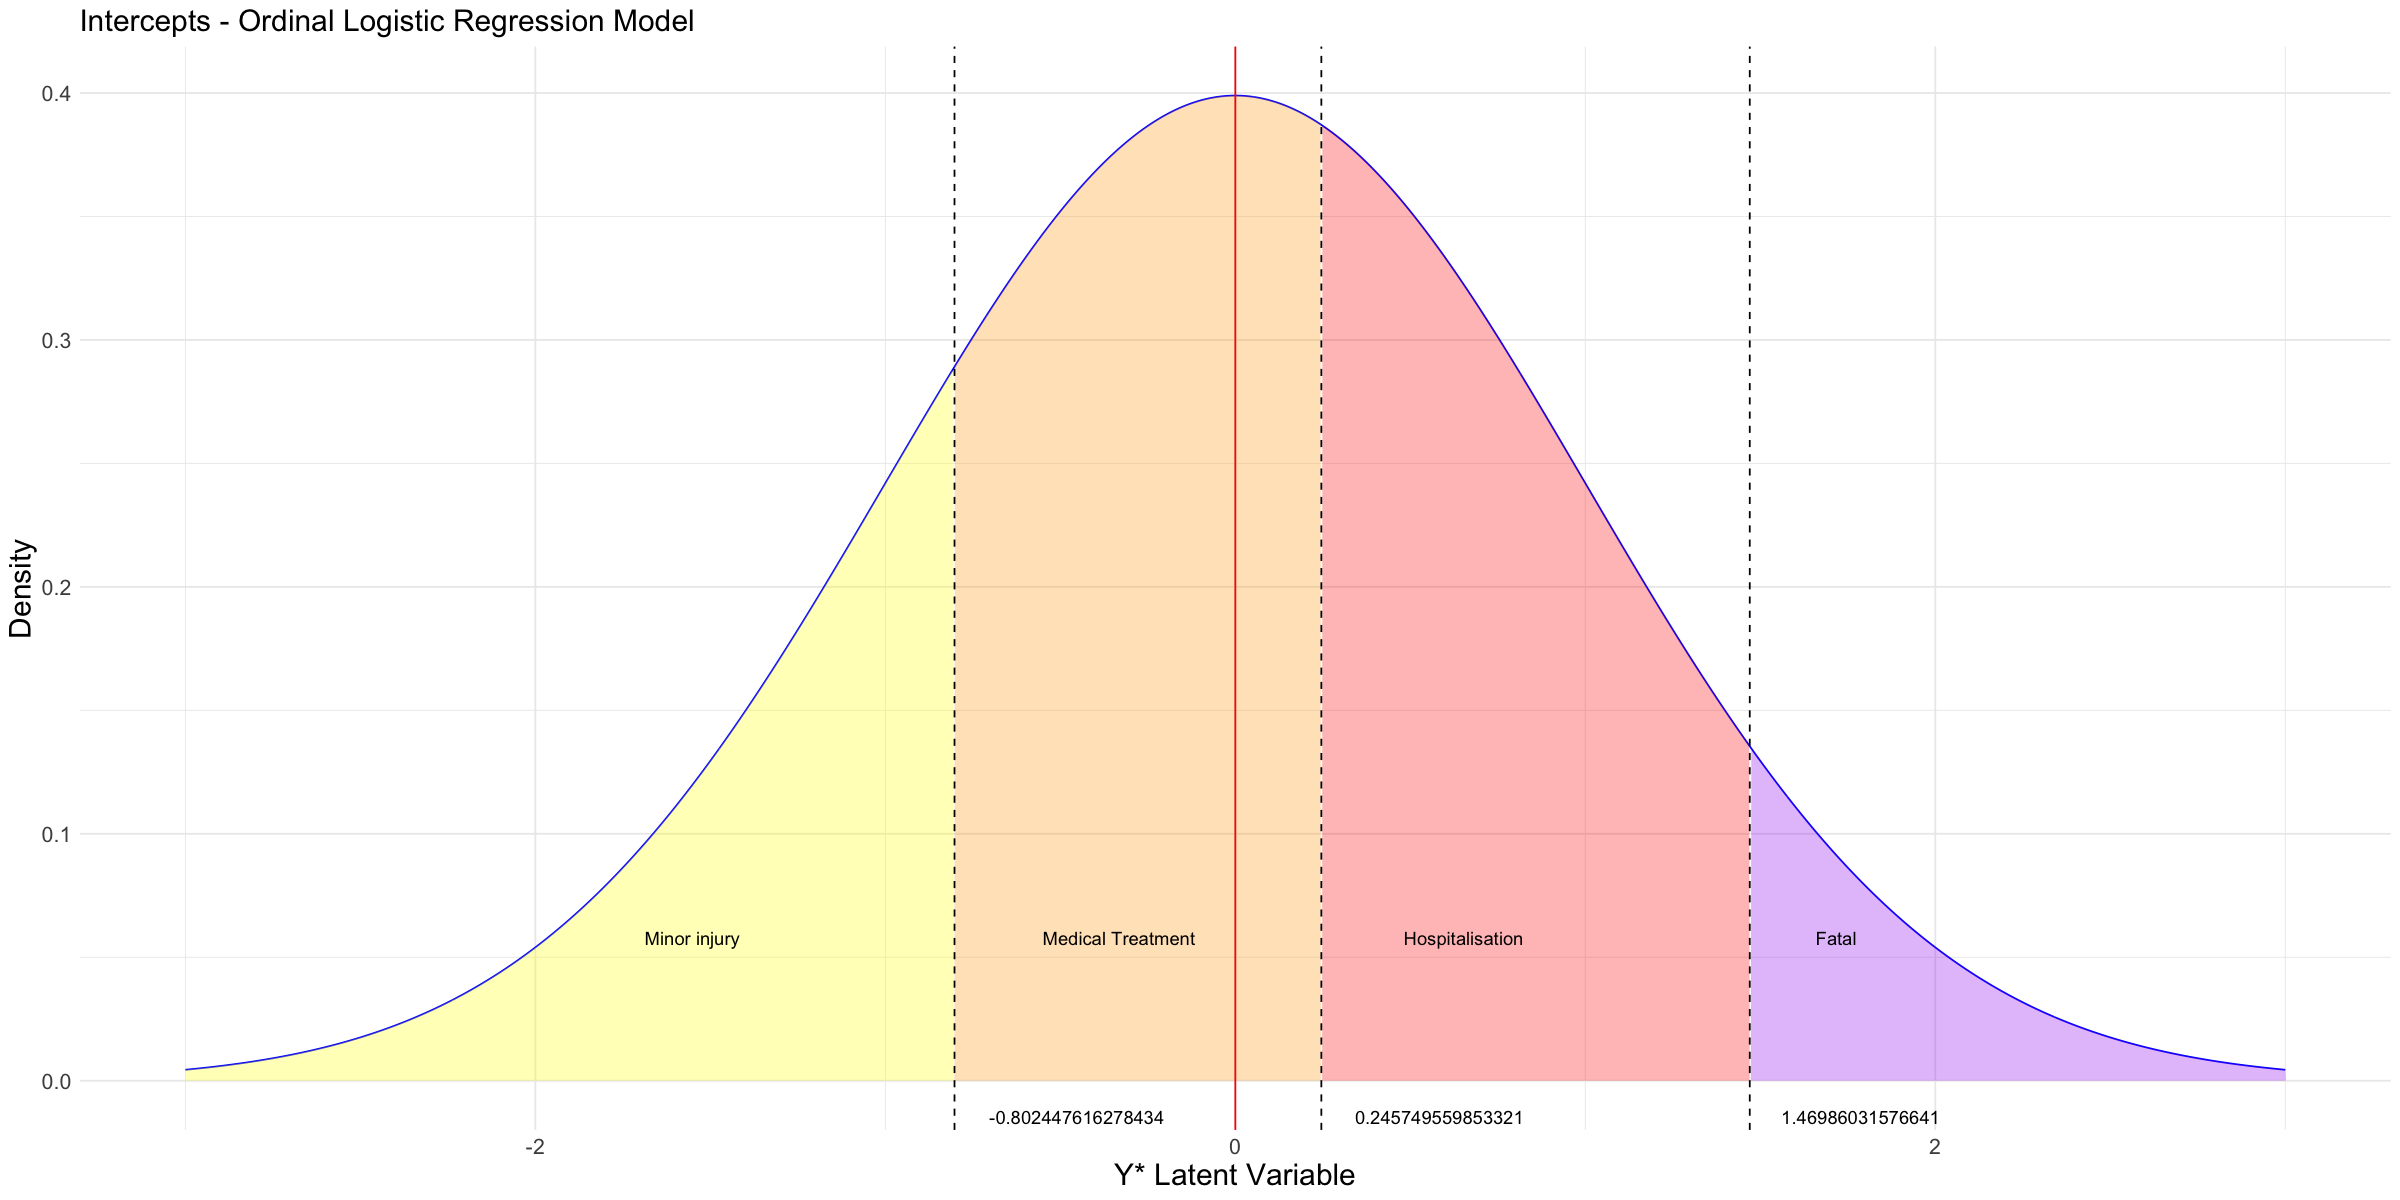

In [21]:
# Create a sequence of x-values from -3 to 3
x <- seq(-3, 3, length = 1000)

# Calculate the corresponding y-values for the bell curve
mean_value <- 0  # Centered at zero
sd_value <- 1     # Standard deviation

# Create a data frame for the bell curve
curve_data <- data.frame(x = x, y = dnorm(x, mean = mean_value, sd = sd_value))
labels <- data.frame(label = rownames(inter), values = inter$intercepts)

# fill range
fill_range <- inter

# Create a data frame for the fill area
fill_minor <- curve_data[curve_data$x <= fill_range[1, ], ]


fill_med <- curve_data[curve_data$x >= fill_range[1, ] & 
                        curve_data$x <= fill_range[2, ], ]


fill_hosp <- curve_data[curve_data$x >= fill_range[2, ] & 
                        curve_data$x <= fill_range[3, ], ]

fill_fatal <- curve_data[curve_data$x >= fill_range[3, ], ]

# Plot the bell curve
ggplot(data = curve_data, aes(x = x, y = y)) +
  geom_line(color = "blue") +
   
    theme_minimal() +
    theme(
        text = element_text(size = 16),  # Increase the overall text size
        plot.title = element_text(size = 18),  # Increase the title font size
        axis.title.x = element_text(size = 18),  # Increase the x-axis label font size
        axis.title.y = element_text(size = 18)  # Increase the y-axis label font size
    ) +
    # Fill the area between the two intercepts
    geom_area(data = fill_minor, aes(x = x, y = y), fill = "yellow", alpha = 0.3) +
    # Fill the area between the two intercepts
    geom_area(data = fill_med, aes(x = x, y = y), fill = "orange", alpha = 0.3) +
    # Fill the area between the two intercepts
    geom_area(data = fill_hosp, aes(x = x, y = y), fill = "red", alpha = 0.3) +
    # Fill the area between the two intercepts
    geom_area(data = fill_fatal, aes(x = x, y = y), fill = "purple", alpha = 0.3) +

    # Add vertical lines for the intercepts
    geom_vline(data = inter, aes(xintercept = intercepts), linetype = "dashed") +

    # Add intercept labels
    geom_text(data = labels, aes(x = values, y = 0.1, label = values), hjust = -0.2, vjust = 22) +

    # Add line for Y*
    # Add a vertical line based on the specified x-coordinate
    geom_vline(xintercept = mean_value, color = "red") +

    geom_text(data = data.frame(x = -1.85, y = 0.002, label = "Minor injury"), aes(x = x, y = y, label = label), hjust = -0.6, vjust = -10) +
    geom_text(data = data.frame(x = -0.55, y = 0.002, label = "Medical Treatment"), aes(x = x, y = y, label = label), hjust = 0, vjust = -10) +
    geom_text(data = data.frame(x = 0.55, y = 0.002, label = "Hospitalisation"), aes(x = x, y = y, label = label), hjust = 0.2, vjust = -10) +
    geom_text(data = data.frame(x = 1.6, y = 0.002, label = "Fatal"), aes(x = x, y = y, label = label), hjust = -0.5, vjust = -10) +

    labs(x = "Y* Latent Variable", y = "Density", title = "Intercepts - Ordinal Logistic Regression Model")


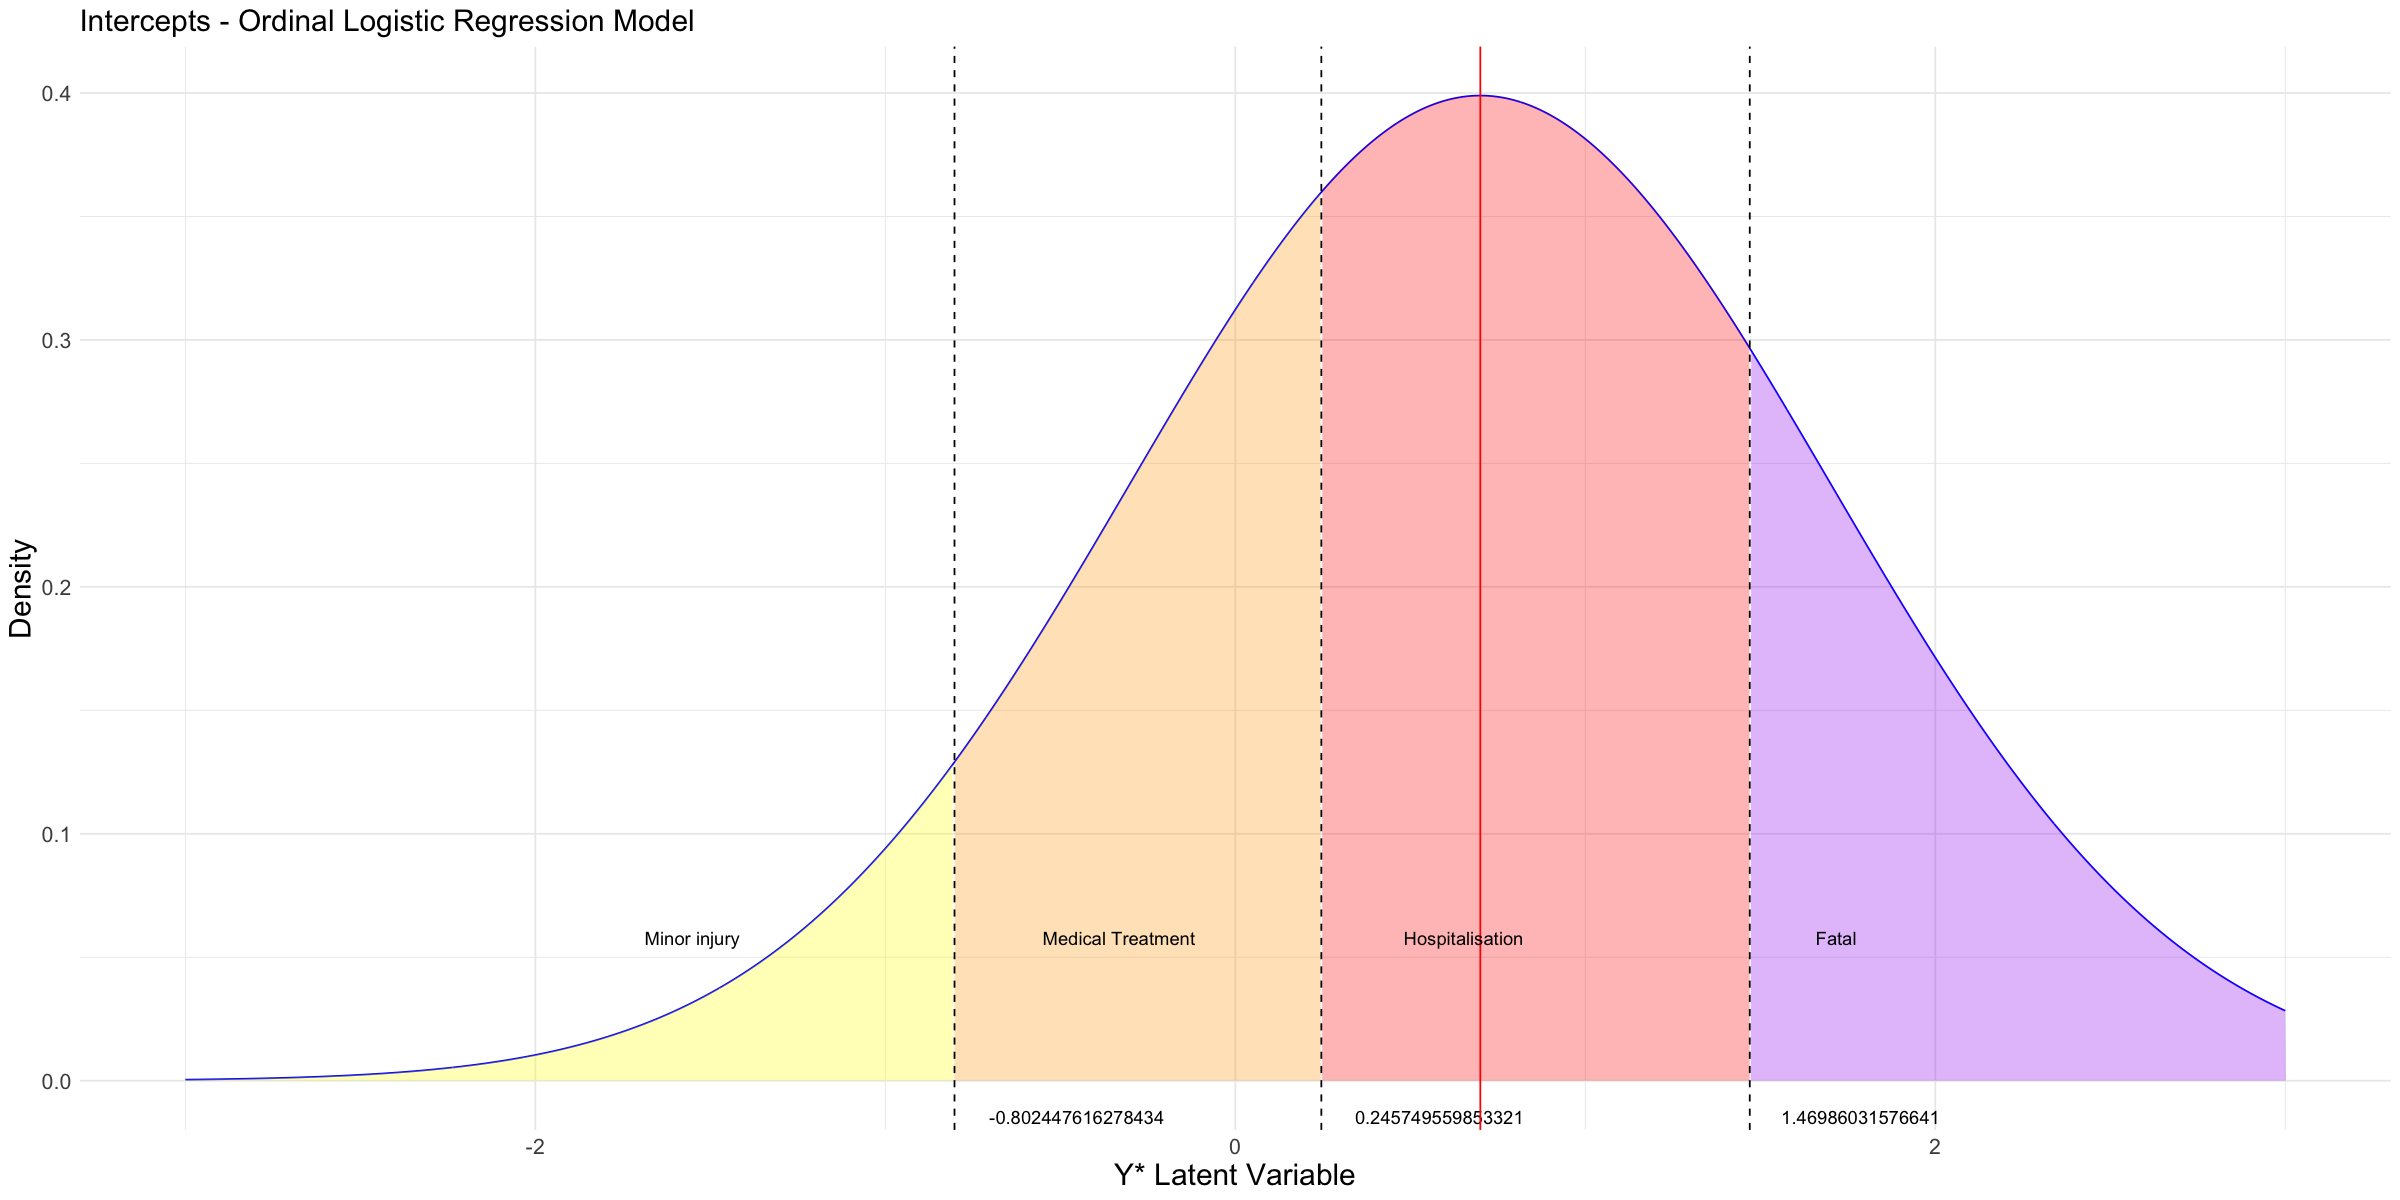

In [22]:
# Create a sequence of x-values from -3 to 3
x <- seq(-3, 3, length = 1000)

# Calculate the corresponding y-values for the bell curve
mean_value <- 0.7  # Centered at zero
sd_value <- 1     # Standard deviation

# Create a data frame for the bell curve
curve_data <- data.frame(x = x, y = dnorm(x, mean = mean_value, sd = sd_value))
labels <- data.frame(label = rownames(inter), values = inter$intercepts)

# fill range
fill_range <- inter

# Create a data frame for the fill area
fill_minor <- curve_data[curve_data$x <= fill_range[1, ], ]


fill_med <- curve_data[curve_data$x >= fill_range[1, ] & 
                        curve_data$x <= fill_range[2, ], ]


fill_hosp <- curve_data[curve_data$x >= fill_range[2, ] & 
                        curve_data$x <= fill_range[3, ], ]

fill_fatal <- curve_data[curve_data$x >= fill_range[3, ], ]


# Plot the bell curve
ggplot(data = curve_data, aes(x = x, y = y)) +
  geom_line(color = "blue") +
   
    theme_minimal() +
    theme(
        text = element_text(size = 16),  # Increase the overall text size
        plot.title = element_text(size = 18),  # Increase the title font size
        axis.title.x = element_text(size = 18),  # Increase the x-axis label font size
        axis.title.y = element_text(size = 18)  # Increase the y-axis label font size
    ) +
    # Fill the area between the two intercepts
    geom_area(data = fill_minor, aes(x = x, y = y), fill = "yellow", alpha = 0.3) +
    # Fill the area between the two intercepts
    geom_area(data = fill_med, aes(x = x, y = y), fill = "orange", alpha = 0.3) +
    # Fill the area between the two intercepts
    geom_area(data = fill_hosp, aes(x = x, y = y), fill = "red", alpha = 0.3) +
    # Fill the area between the two intercepts
    geom_area(data = fill_fatal, aes(x = x, y = y), fill = "purple", alpha = 0.3) +

    # Add vertical lines for the intercepts
    geom_vline(data = inter, aes(xintercept = intercepts), linetype = "dashed") +

    # Add intercept labels
    geom_text(data = labels, aes(x = values, y = 0.1, label = values), hjust = -0.2, vjust = 22) +

    # Add line for Y*
    # Add a vertical line based on the specified x-coordinate
    geom_vline(xintercept = mean_value, color = "red") +

     geom_text(data = data.frame(x = -1.85, y = 0.002, label = "Minor injury"), aes(x = x, y = y, label = label), hjust = -0.6, vjust = -10) +
    geom_text(data = data.frame(x = -0.55, y = 0.002, label = "Medical Treatment"), aes(x = x, y = y, label = label), hjust = 0, vjust = -10) +
    geom_text(data = data.frame(x = 0.55, y = 0.002, label = "Hospitalisation"), aes(x = x, y = y, label = label), hjust = 0.2, vjust = -10) +
    geom_text(data = data.frame(x = 1.6, y = 0.002, label = "Fatal"), aes(x = x, y = y, label = label), hjust = -0.5, vjust = -10) +

    labs(x = "Y* Latent Variable", y = "Density", title = "Intercepts - Ordinal Logistic Regression Model")

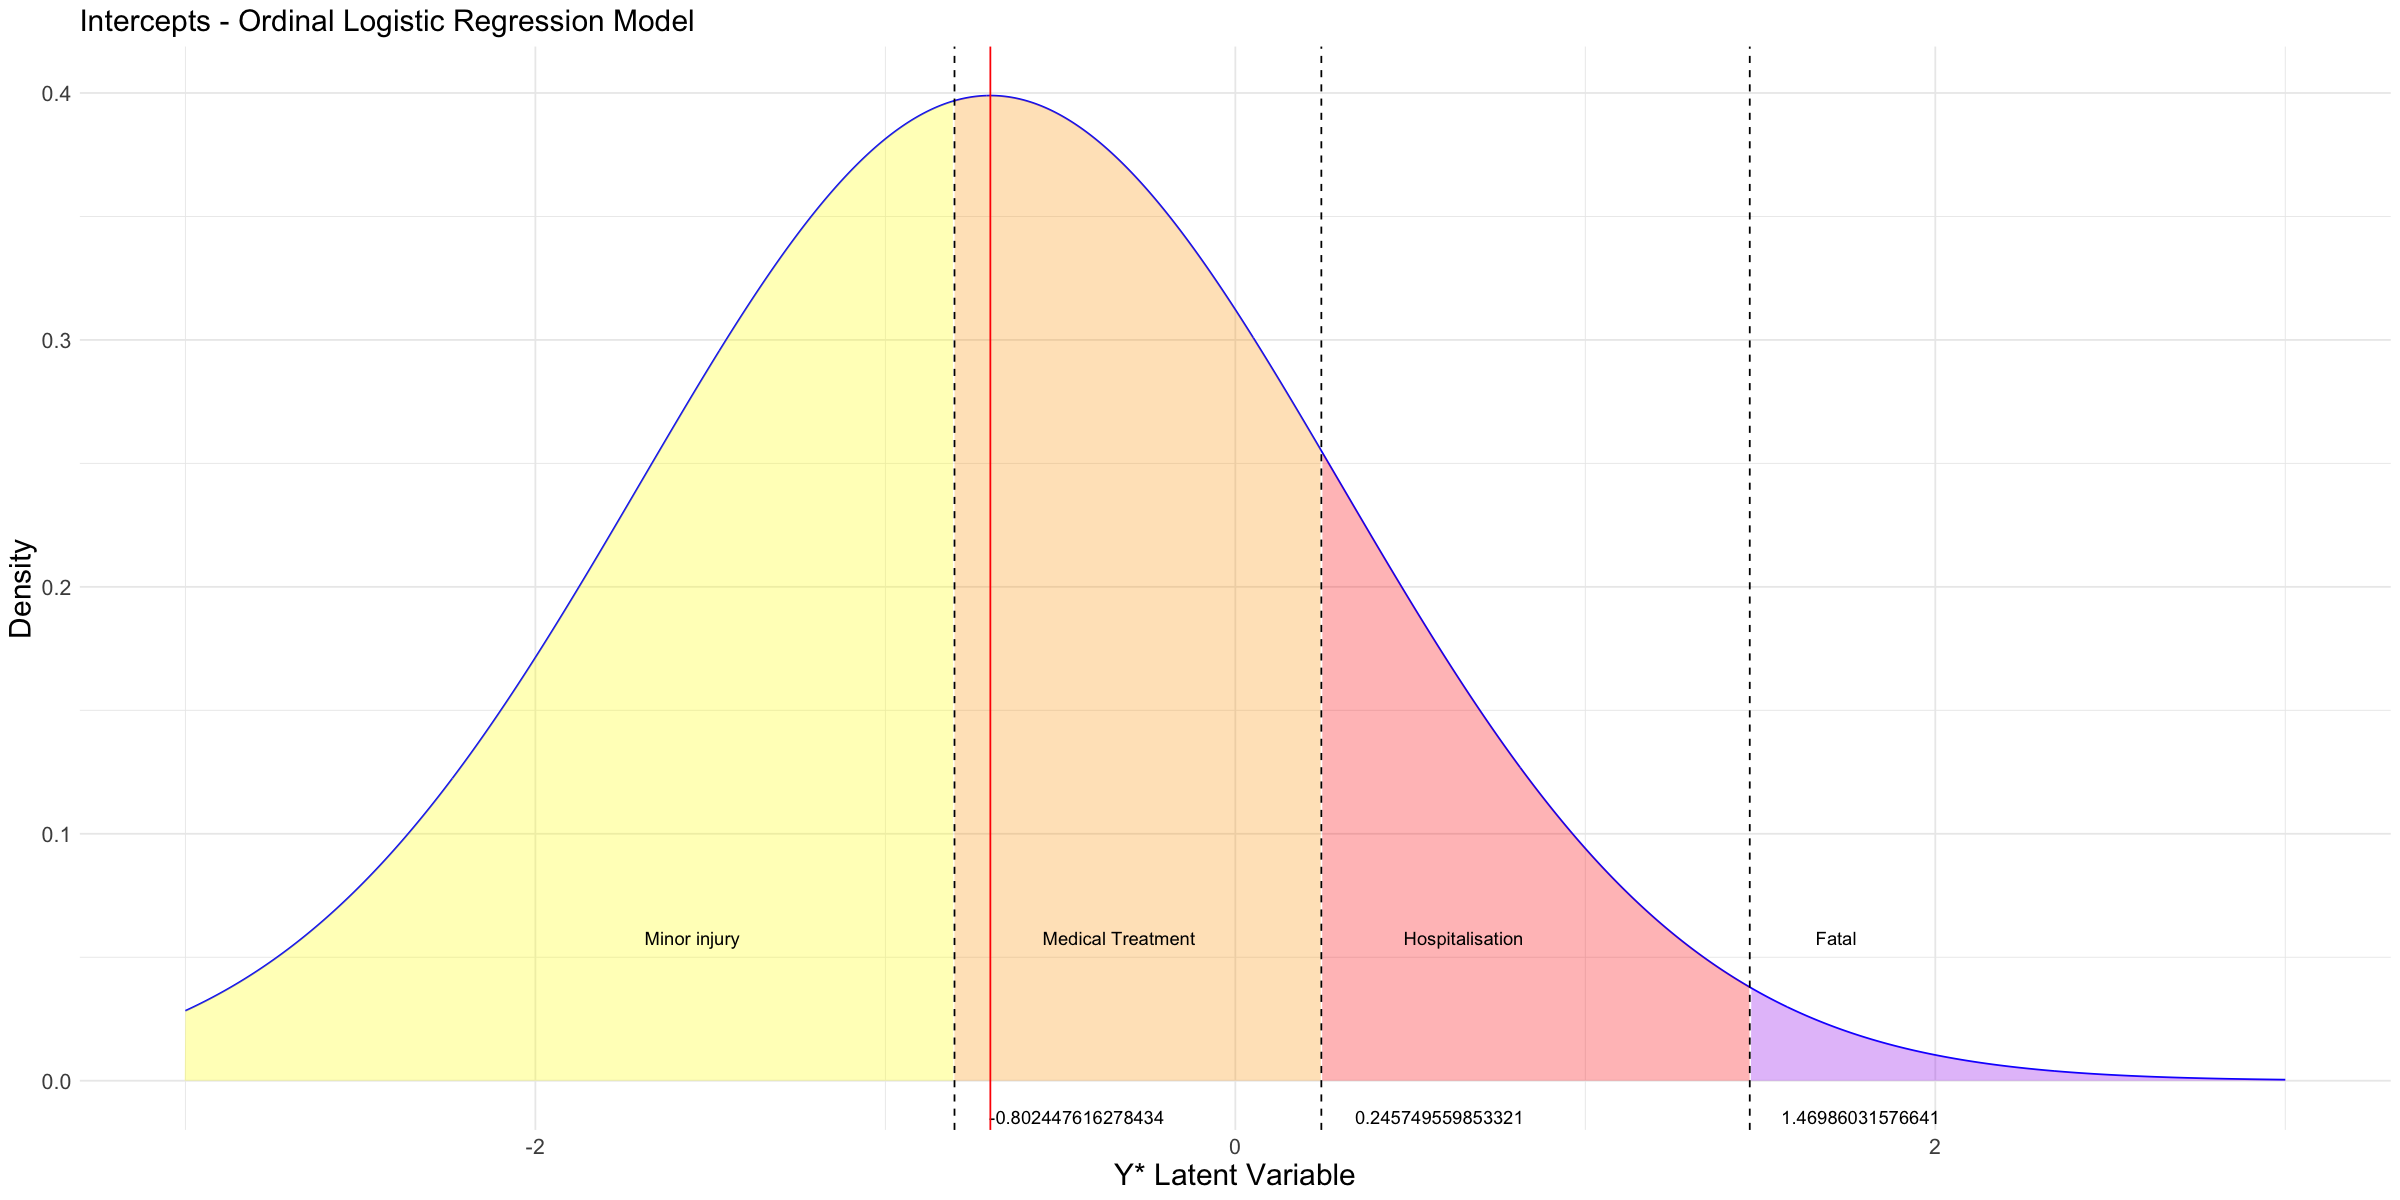

In [23]:
# Create a sequence of x-values from -3 to 3
x <- seq(-3, 3, length = 1000)

# Calculate the corresponding y-values for the bell curve
mean_value <- -0.7  # Centered at zero
sd_value <- 1     # Standard deviation

# Create a data frame for the bell curve
curve_data <- data.frame(x = x, y = dnorm(x, mean = mean_value, sd = sd_value))
labels <- data.frame(label = rownames(inter), values = inter$intercepts)

# fill range
fill_range <- inter

# Create a data frame for the fill area
fill_minor <- curve_data[curve_data$x <= fill_range[1, ], ]


fill_med <- curve_data[curve_data$x >= fill_range[1, ] & 
                        curve_data$x <= fill_range[2, ], ]


fill_hosp <- curve_data[curve_data$x >= fill_range[2, ] & 
                        curve_data$x <= fill_range[3, ], ]

fill_fatal <- curve_data[curve_data$x >= fill_range[3, ], ]

# Plot the bell curve
ggplot(data = curve_data, aes(x = x, y = y)) +
  geom_line(color = "blue") +
   
    theme_minimal() +
    theme(
        text = element_text(size = 16),  # Increase the overall text size
        plot.title = element_text(size = 18),  # Increase the title font size
        axis.title.x = element_text(size = 18),  # Increase the x-axis label font size
        axis.title.y = element_text(size = 18)  # Increase the y-axis label font size
    ) +
    # Fill the area between the two intercepts
    geom_area(data = fill_minor, aes(x = x, y = y), fill = "yellow", alpha = 0.3) +
    # Fill the area between the two intercepts
    geom_area(data = fill_med, aes(x = x, y = y), fill = "orange", alpha = 0.3) +
    # Fill the area between the two intercepts
    geom_area(data = fill_hosp, aes(x = x, y = y), fill = "red", alpha = 0.3) +
    # Fill the area between the two intercepts
    geom_area(data = fill_fatal, aes(x = x, y = y), fill = "purple", alpha = 0.3) +

    # Add vertical lines for the intercepts
    geom_vline(data = inter, aes(xintercept = intercepts), linetype = "dashed") +

    # Add intercept labels
    geom_text(data = labels, aes(x = values, y = 0.1, label = values), hjust = -0.2, vjust = 22) +

    # Add line for Y*
    # Add a vertical line based on the specified x-coordinate
    geom_vline(xintercept = mean_value, color = "red") +

     geom_text(data = data.frame(x = -1.85, y = 0.002, label = "Minor injury"), aes(x = x, y = y, label = label), hjust = -0.6, vjust = -10) +
    geom_text(data = data.frame(x = -0.55, y = 0.002, label = "Medical Treatment"), aes(x = x, y = y, label = label), hjust = 0, vjust = -10) +
    geom_text(data = data.frame(x = 0.55, y = 0.002, label = "Hospitalisation"), aes(x = x, y = y, label = label), hjust = 0.2, vjust = -10) +
    geom_text(data = data.frame(x = 1.6, y = 0.002, label = "Fatal"), aes(x = x, y = y, label = label), hjust = -0.5, vjust = -10) +

    labs(x = "Y* Latent Variable", y = "Density", title = "Intercepts - Ordinal Logistic Regression Model")

## Model Diagnostics

### Likelihood Ratio Test (LRT)

Compared to null model

In [24]:
null_model <- polr(severity ~ 1, data = train)
lr_test <- anova(mpolr, null_model)
print(lr_test)

Likelihood ratio tests of ordinal regression models

Response: severity
                                                              Model Resid. df
1                                                                 1      2729
2 sp_limit + atmospheric + lighting + road_surface + road_condition      2720
  Resid. Dev   Test    Df LR stat.      Pr(Chi)
1   7550.793                                   
2   7460.221 1 vs 2     9 90.57188 1.221245e-15


We can reject the null hypothesis which indicates that the predictors have a significant effect on the ordinal outcome.

### Categorical Predictive Power

In [25]:
# 6. Categorical Predictive Power
# McFadden's R-squared
mcfadden_r2 <- 1 - (logLik(null_model) - logLik(mpolr)) / logLik(null_model)
print(mcfadden_r2)

'log Lik.' 0.988005 (df=3)


In [26]:
G <- -2 * (logLik(mpolr)[1] - logLik(msev)[1])

pchisq(G, df = length(mpolr$zeta) - 1, lower.tail = FALSE)

[1] 2.063258e-05

The p-value < 0.05, indicates that the proportional odds model DOES NOT fit as well as the more complex multinomial logit model.  Hosmer and Lemeshow tell us this test is not "completely statistically correct." Nevertheless it does "provide some evidence of model adequacy"

### Lipsitz Test

In [27]:
generalhoslem::lipsitz.test(mpolr)


	Lipsitz goodness of fit test for ordinal response models

data:  formula:  severity ~ sp_limit + atmospheric + lighting + road_surface + formula:      road_condition
LR statistic = 12.399, df = 9, p-value = 0.1917


The p-value > 0.05 means we cannot reject the null hypothesis aand therefore the fitted model satisfies the proportional odds assumption

### Pulkstenis-Robinson test

In [28]:
generalhoslem::pulkrob.chisq(mpolr, rownames(coef(summary(mpolr))))


Re-fitting to get Hessian





	Pulkstenis-Robinson chi-squared test

data:  formula:  severity ~ sp_limit + atmospheric + lighting + road_surface + formula:      road_condition
X-squared = 21.011, df = 14, p-value = 0.1014


The p-value > 0.05 means we cannot reject the null hypothesis and therefore the fitted model satisfies the proportional odds assumption

### Hosmer and Lemeshow test

In [29]:
generalhoslem::logitgof(train$severity, fitted(mpolr), g = 5, ord = TRUE)


	Hosmer and Lemeshow test (ordinal model)

data:  train$severity, fitted(mpolr)
X-squared = 11.545, df = 11, p-value = 0.3988


The p-value > 0.05 means we cannot reject the null hypothesis aand therefore the fitted model satisfies the proportional odds assumption

### Parallel Regression Assumption

test the parallel regression assumption. It tests the main assumption of the order logit model that we have proportional odds assumption met, in other words if odds are constant. On any level of outcome variable level the odds should be the same. In the output p-value of omnibus test says that we cannot reject null hypothesis, therefore odds assumption met and we can use ordered logit model.

In [30]:
brant::brant(mpolr)

------------------------------------------------------------ 
Test for			X2	df	probability 
------------------------------------------------------------ 
Omnibus				22.99	18	0.19
sp_limit			4.89	2	0.09
atmosphericFog			0.78	2	0.68
atmosphericRaining		2.88	2	0.24
atmosphericSmoke/Dust		0.25	2	0.88
lightingDarkness/Not lighted	0.62	2	0.73
lightingDawn/Dusk		6.76	2	0.03
lightingDaylight		10.97	2	0
road_surfaceUnsealed		0.49	2	0.78
road_conditionWet		1.12	2	0.57
------------------------------------------------------------ 

H0: Parallel Regression Assumption holds


Warning message in brant::brant(mpolr):
“150 combinations in table(dv,ivs) do not occur. Because of that, the test results might be invalid.”


If at least one variable and the Omnibus test have probability lower than 0.05, the test failed. No ordinal regression model.

In [31]:
# PseudoR2 Stats
DescTools::PseudoR2(
  mpolr, 
  which = c("McFadden", "CoxSnell", "Nagelkerke", "AIC")
)

McFadden     CoxSnell   Nagelkerke          AIC 
1.199502e-02 3.260871e-02 3.480303e-02 7.484221e+03

### Deviance and Pearson Goodness of Fit Test

In [32]:
# 3. Deviance and Pearson Goodness of Fit Tests
deviance_test <- pchisq(deviance(mpolr), df.residual(mpolr), lower.tail = FALSE)
pearson_test <- pchisq(sum(mpolr$weights * residuals(mpolr, type = "pearson")^2), df.residual(mpolr), lower.tail = FALSE)
print(deviance_test)
print(pearson_test)

[1] 0
[1] 1


### Parameters/Coefficients interpretation

#### Intercepts

In [33]:
exp(mpolr$zeta)/ (1+exp(mpolr$zeta))

Minor injury|Medical treatment Medical treatment|Hospitalisation 
                        0.3095022                         0.5611300 
            Hospitalisation|Fatal 
                        0.8130362

In [34]:
cumsum(
  prop.table(
    table(crash_data$severity[crash_data$road_condition == "Wet"])))

# Wet is the reference category for road_condition

# proportion of crashes with minor injury outcome is 0.25 and the estimated proportion of crashes with minor injury or medical treatment or hospitalisation
# is equal to 0.76

Minor injury Medical treatment   Hospitalisation             Fatal 
        0.2450199         0.4840637         0.7579681         1.0000000

#### Coefficients

Registered S3 methods overwritten by 'broom':
  method            from  
  tidy.glht         jtools
  tidy.summary.glht jtools

Loading required namespace: broom.mixed


Re-fitting to get Hessian


Loading required namespace: broom.mixed


Re-fitting to get Hessian




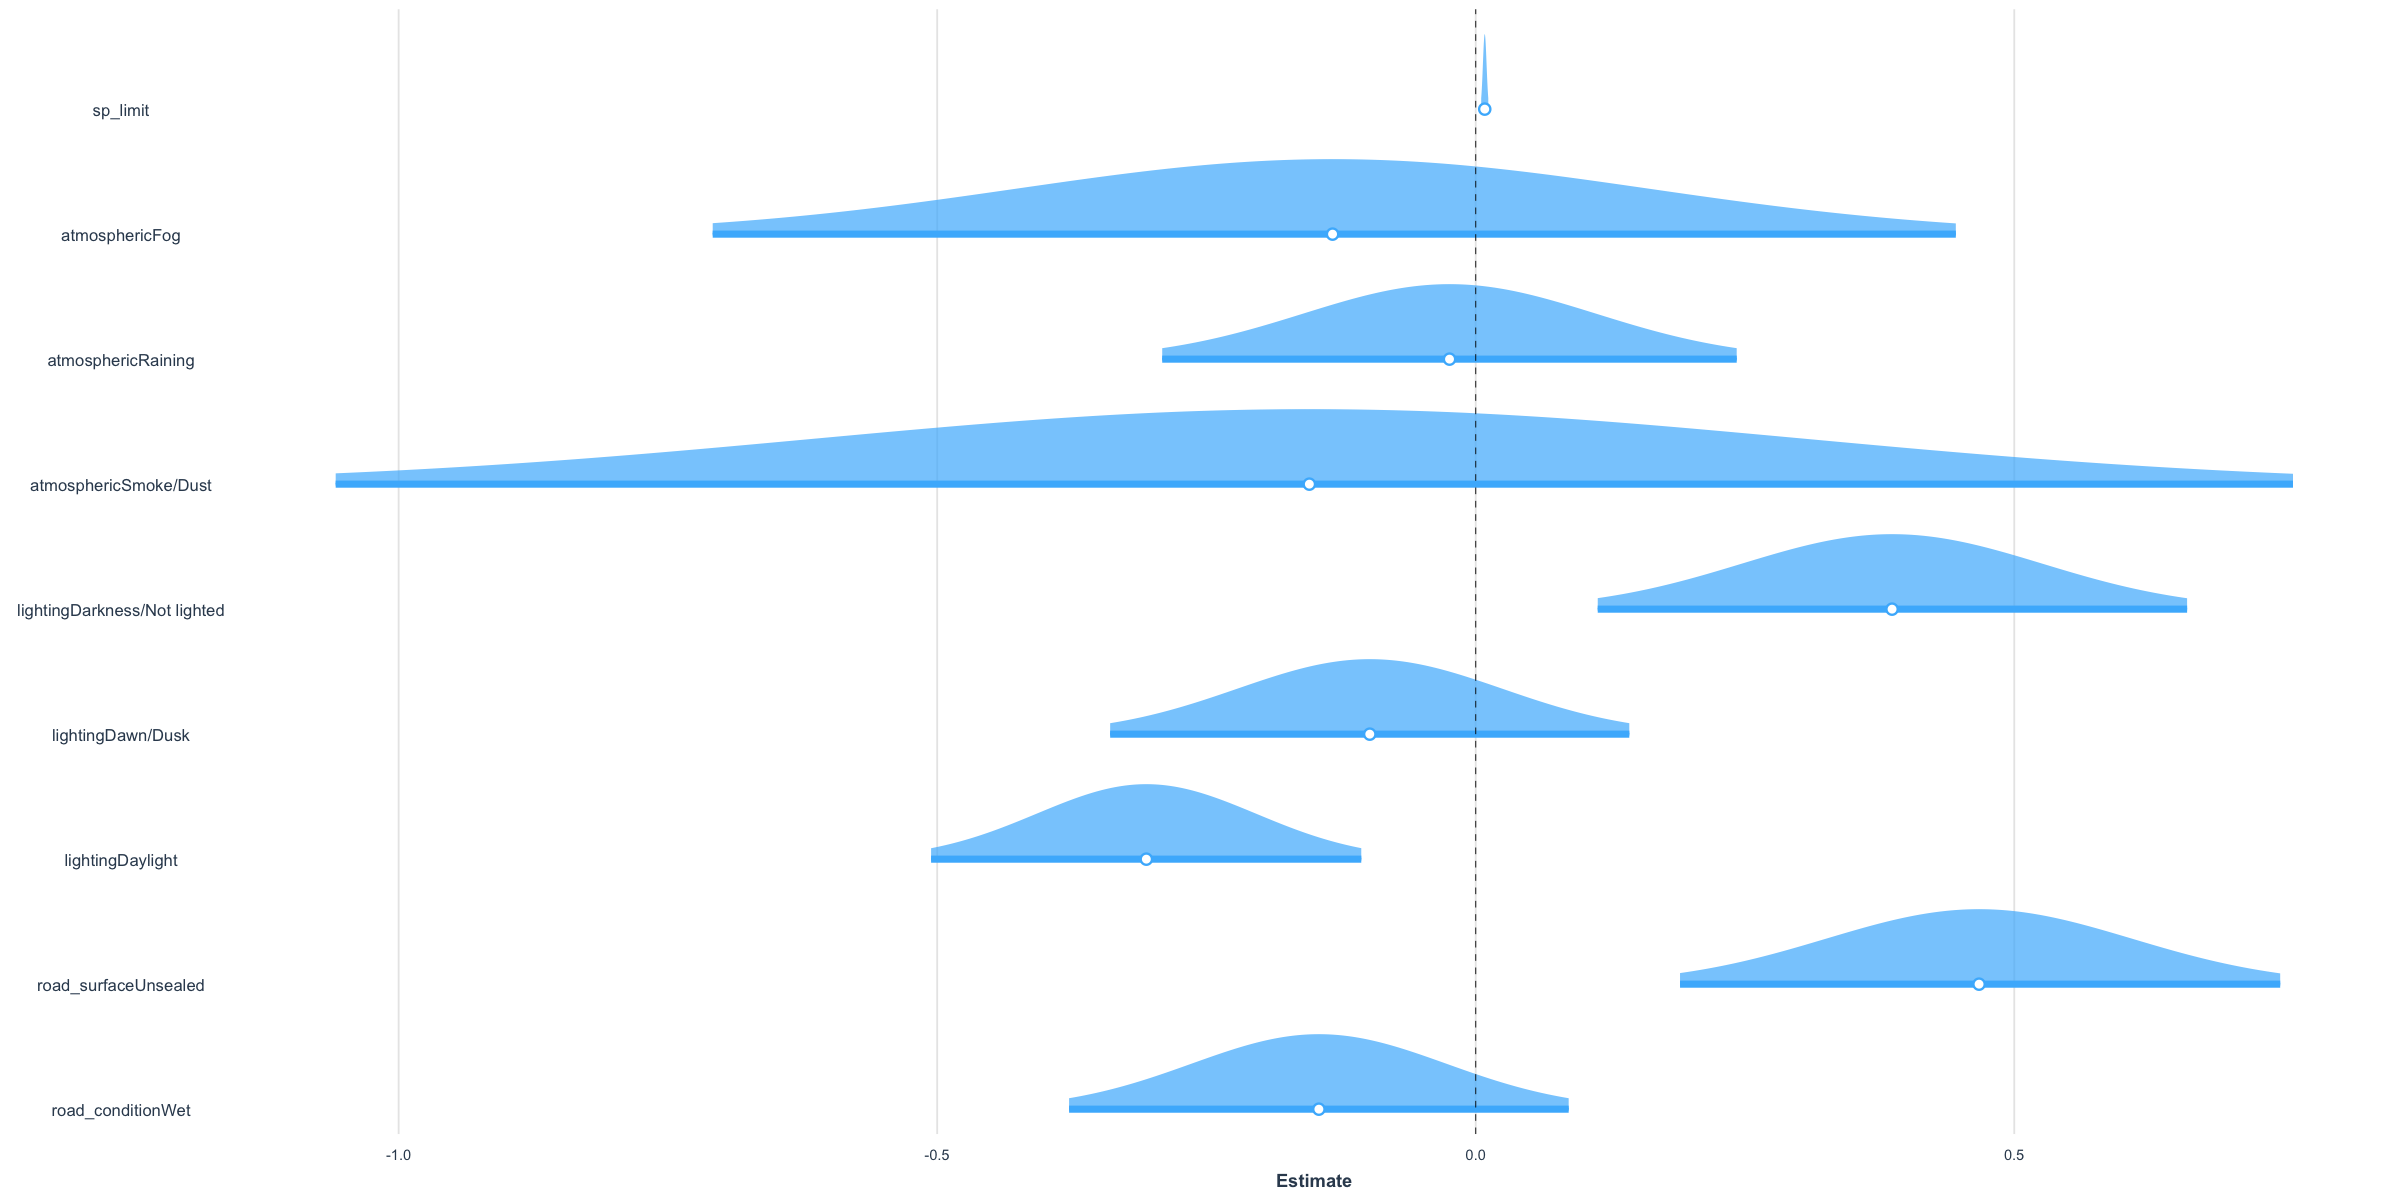

In [35]:
jtools::plot_summs(mpolr, scale = TRUE, plot.distributions = TRUE, rescale.distributions = TRUE, inner_ci_level = .95)

In [36]:
confint(mpolr)

Waiting for profiling to be done...


Re-fitting to get Hessian




,2.5 %,97.5 %
sp_limit,0.005075492,0.01167302
atmosphericFog,-0.708404849,0.44574253
atmosphericRaining,-0.291074437,0.24230841
atmosphericSmoke/Dust,-1.058450451,0.75879345
lightingDarkness/Not lighted,0.113287268,0.66047237
lightingDawn/Dusk,-0.339399333,0.14259310
lightingDaylight,-0.505654084,-0.10626009
road_surfaceUnsealed,0.189694951,0.74690259
road_conditionWet,-0.377532123,0.08630478


In [37]:
ctable <- coef(summary(mpolr, digits = 3))

p <- pnorm(abs(ctable[, "t value"]), lower.tail = FALSE) * 2

## combined table
ctable <- cbind(ctable, "p value" = p)

ctable


Re-fitting to get Hessian




,Value,Std. Error,t value,p value
sp_limit,0.008369325,0.001683569,4.9711792,6.654690e-07
atmosphericFog,-0.132914223,0.293466282,-0.4529114,6.506125e-01
atmosphericRaining,-0.024328754,0.136028826,-0.1788500,8.580555e-01
atmosphericSmoke/Dust,-0.154476014,0.459188883,-0.3364106,7.365612e-01
lightingDarkness/Not lighted,0.386549702,0.139553771,2.7698979,5.607386e-03
lightingDawn/Dusk,-0.098364230,0.122935464,-0.8001290,4.236361e-01
lightingDaylight,-0.305808245,0.101862863,-3.0021564,2.680744e-03
road_surfaceUnsealed,0.467314457,0.142043427,3.2899407,1.002085e-03
road_conditionWet,-0.145614897,0.118275237,-1.2311529,2.182657e-01
Minor injury|Medical treatment,-0.802447616,0.147510615,-5.4399313,5.330111e-08


In [38]:
# Extract the coefficients and p-values
coefficients <- as.data.frame(ctable)[1:9, 1]
p_values <- as.data.frame(ctable)[1:9, 4]

# Create a data frame for plotting
plot_data <- data.frame(
  Predictor = rownames(as.data.frame(ctable))[1:9],
  Coefficient = coefficients,
  P_Value = p_values
)

plot_data

Predictor,Coefficient,P_Value
<chr>,<dbl>,<dbl>
sp_limit,0.008369325,6.654690e-07
atmosphericFog,-0.132914223,6.506125e-01
atmosphericRaining,-0.024328754,8.580555e-01
atmosphericSmoke/Dust,-0.154476014,7.365612e-01
lightingDarkness/Not lighted,0.386549702,5.607386e-03
lightingDawn/Dusk,-0.098364230,4.236361e-01
lightingDaylight,-0.305808245,2.680744e-03
road_surfaceUnsealed,0.467314457,1.002085e-03
road_conditionWet,-0.145614897,2.182657e-01


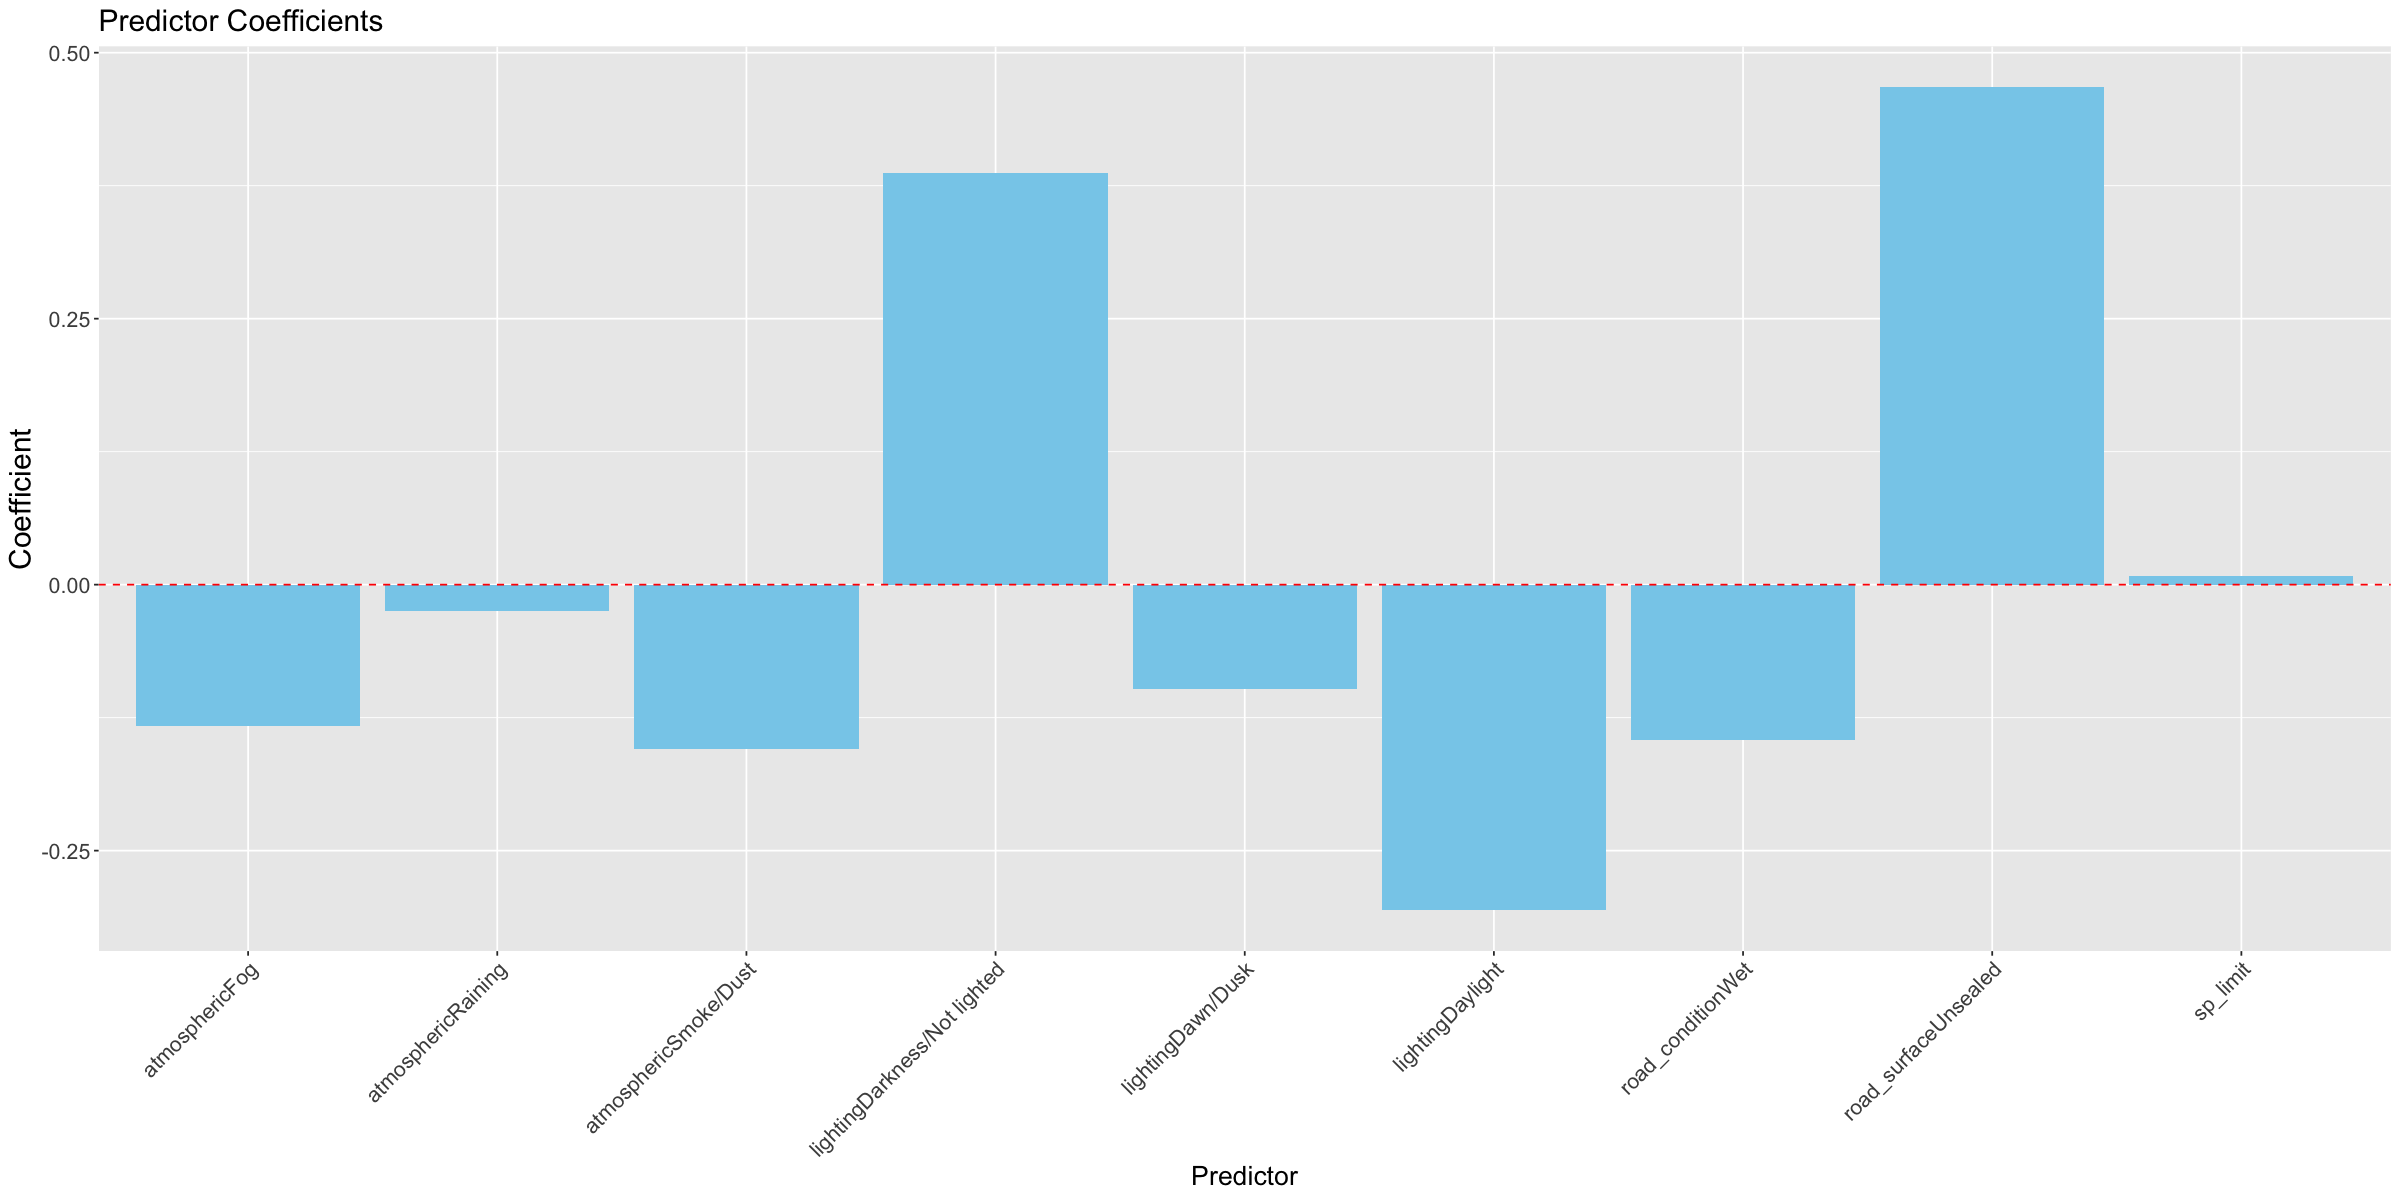

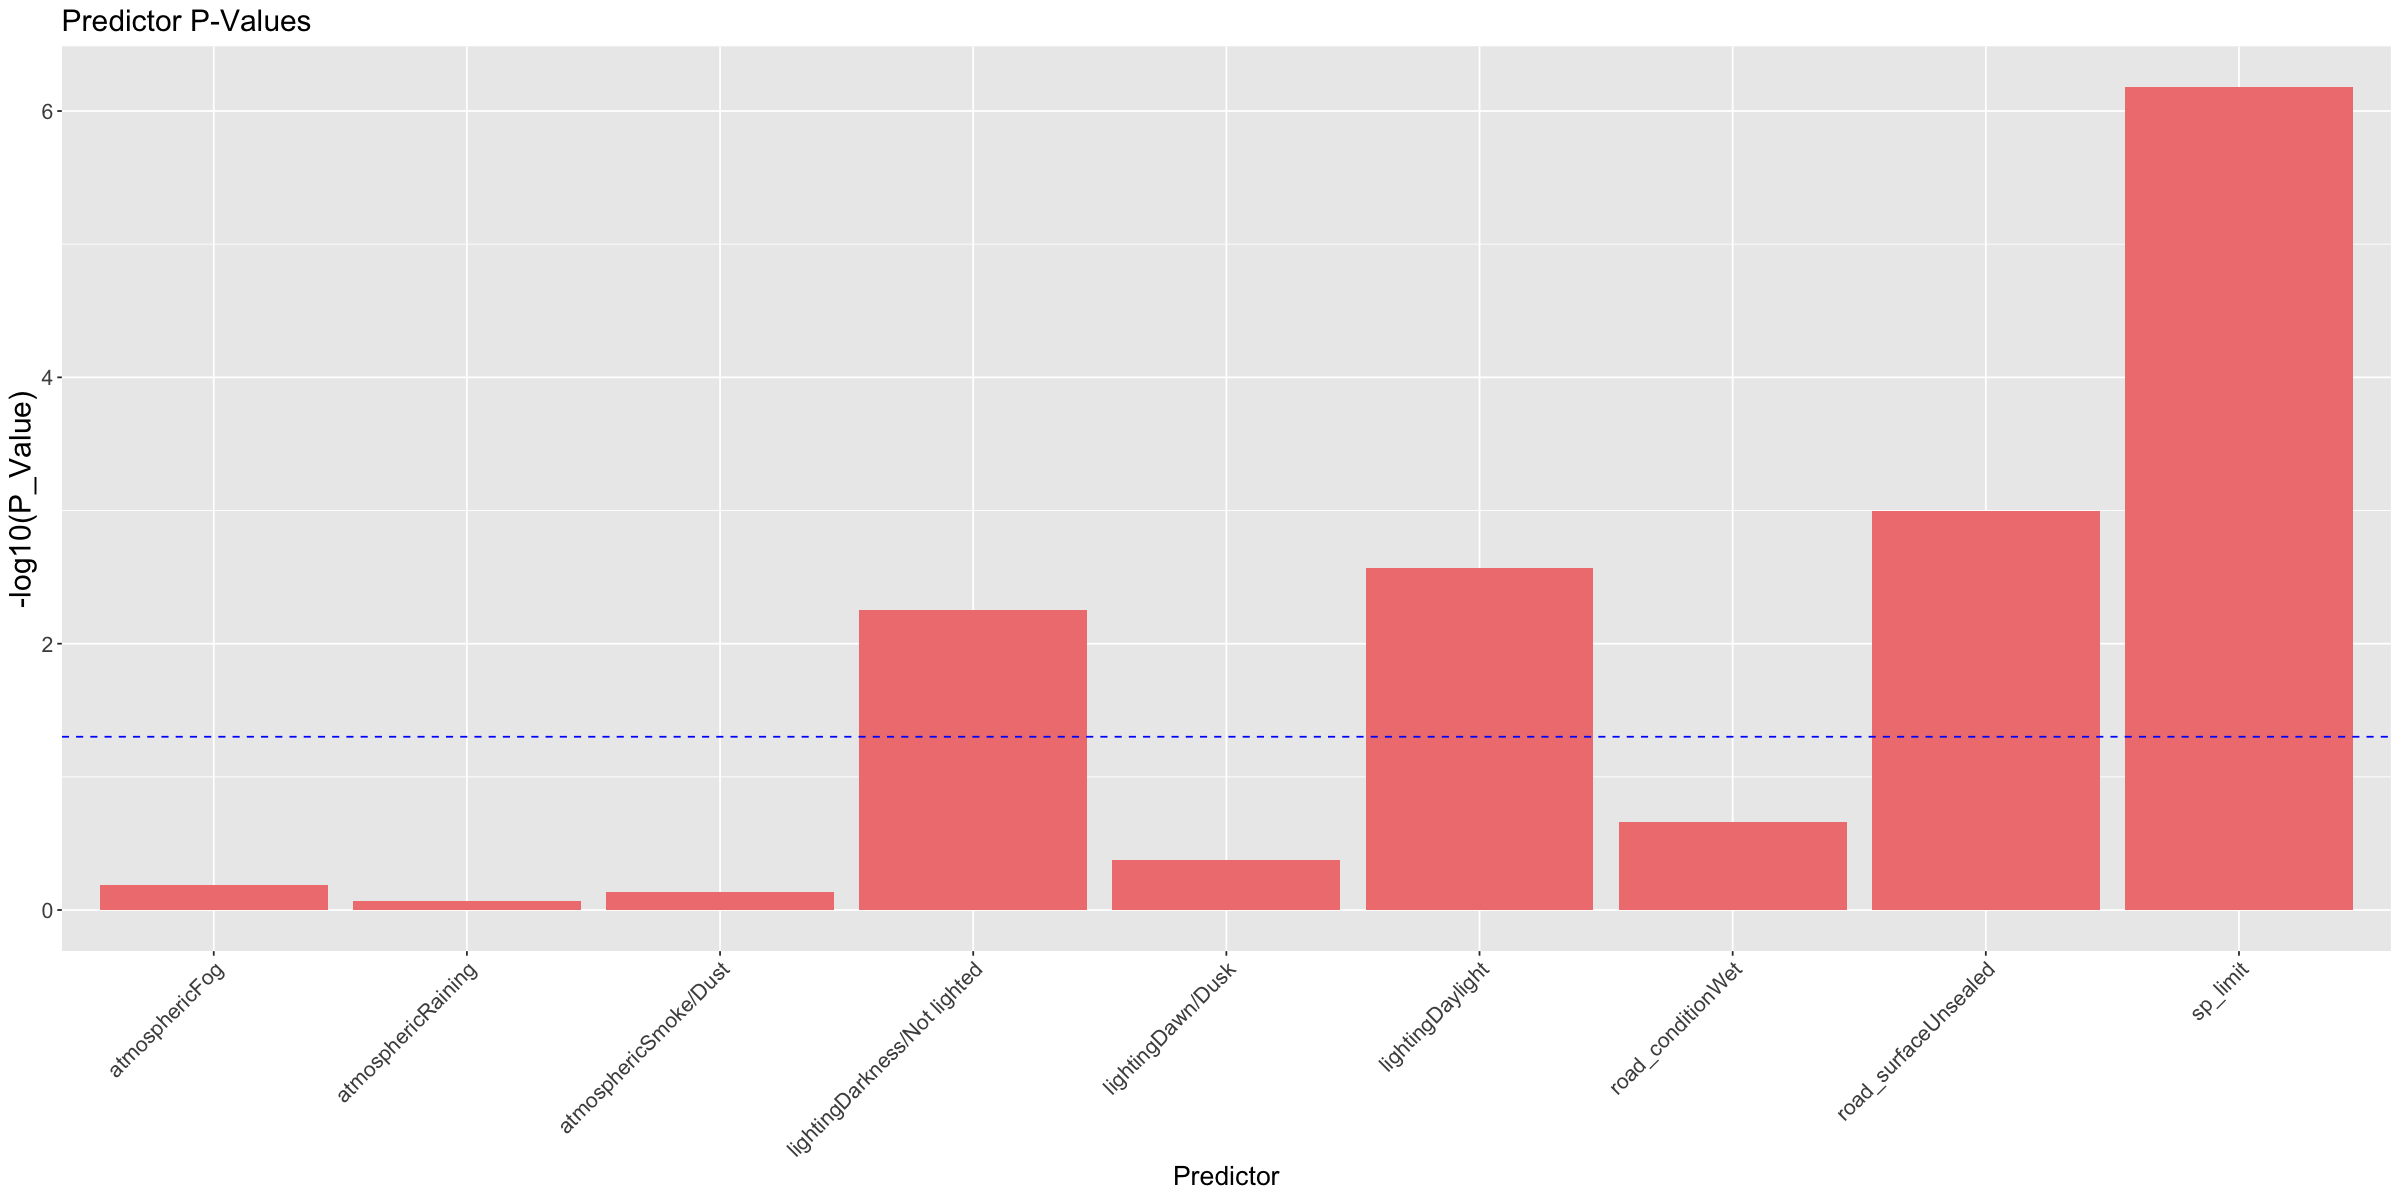

In [39]:
# Create a coefficient plot
coefficient_plot <- ggplot(plot_data, aes(x = Predictor, y = Coefficient)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  geom_hline(yintercept = 0, linetype = "dashed", color = "red") +
  labs(title = "Predictor Coefficients") +
   theme(axis.text.x = element_text(angle = 45, hjust = 1),
           text = element_text(size = 16),  # Increase the overall text size
          plot.title = element_text(size = 18),  # Increase the title font size
          axis.title.y = element_text(size = 18)  # Increase the y-axis label font size)
        ) 
# Create a p-value plot
p_value_plot <- ggplot(plot_data, aes(x = Predictor, y = -log10(P_Value))) +
  geom_bar(stat = "identity", fill = "lightcoral") +
  geom_hline(yintercept = -log10(0.05), linetype = "dashed", color = "blue") +
  labs(title = "Predictor P-Values") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
           text = element_text(size = 16),  # Increase the overall text size
          plot.title = element_text(size = 18),  # Increase the title font size
          axis.title.y = element_text(size = 18)
        )# Increase the y-axis label font size)

# Print or display the plots
print(coefficient_plot)
print(p_value_plot)

Darkness/No Lighted, Wet, Unsealed and Speed Limit produce changes in the log-odds towards a more severe crash

Conversely, Dawn/Dusk, Daylight and Wet, reduce the log-odds of being in a more severe crash


In [40]:
ggsave("coefficient_plot.png", plot = coefficient_plot, width = 10, height = 6)
ggsave("p_value_plot.png", plot = p_value_plot, width = 10, height = 6)

### Estimating the Latent Variable Y*

In [41]:
# get Z-score
zi_polr <- mpolr$lp[10]

print(zi_polr)

     3080 
0.5711818 


In [42]:
# selects observation
train[10, ]

,sp_limit,atmospheric,lighting,road_surface,road_condition,severity
,<int>,<fct>,<fct>,<fct>,<fct>,<ord>
3080,80,Clear,Dawn/Dusk,Sealed,Dry,Minor injury


In [43]:
# vector of predictors
values <- c(80, 0, 0, 0, 0, 1, 0, 0, 0)

# computes z-score
zi <- sum(coefficients * values)

In [44]:
# compares calculated z-score and mass::polr z-score
zi_polr == zi

3080 
TRUE

In [45]:
inter

,intercepts
,<dbl>
Minor injury|Medical treatment,-0.8024476
Medical treatment|Hospitalisation,0.2457496
Hospitalisation|Fatal,1.4698603


In [46]:
# Y* = 0.5711818 falls into the Y = 3 threshold

In [47]:
# predicts probabilities
predict(mpolr,train[10, ],type = "p")

Minor injury Medical treatment   Hospitalisation             Fatal 
        0.2020341         0.2173184         0.2913254         0.2893221

In [48]:
# get intercepts
tau_1 <- inter[1, ]
tau_2 <- inter[2, ]
tau_3 <- inter[3, ]


# probabilities

# Minor injury
p_mi <- 1 / (1 + exp(zi - tau_1))
# Medical treatment
p_mt <-  (1 / (1 + exp(zi - tau_2))) - (1 / (1 + exp(zi - tau_1)))
# Hospitalisation
p_hp <- (1 / (1 + exp(zi - tau_3))) - (1 / (1 + exp(zi - tau_2))) 
# Fatal
p_ft <- 1 - (1 / (1 + exp(zi - tau_3)))

In [49]:
print(p_mi)
print(p_mt)
print(p_hp)
print(p_ft)

[1] 0.2020341
[1] 0.2173184
[1] 0.2913254
[1] 0.2893221


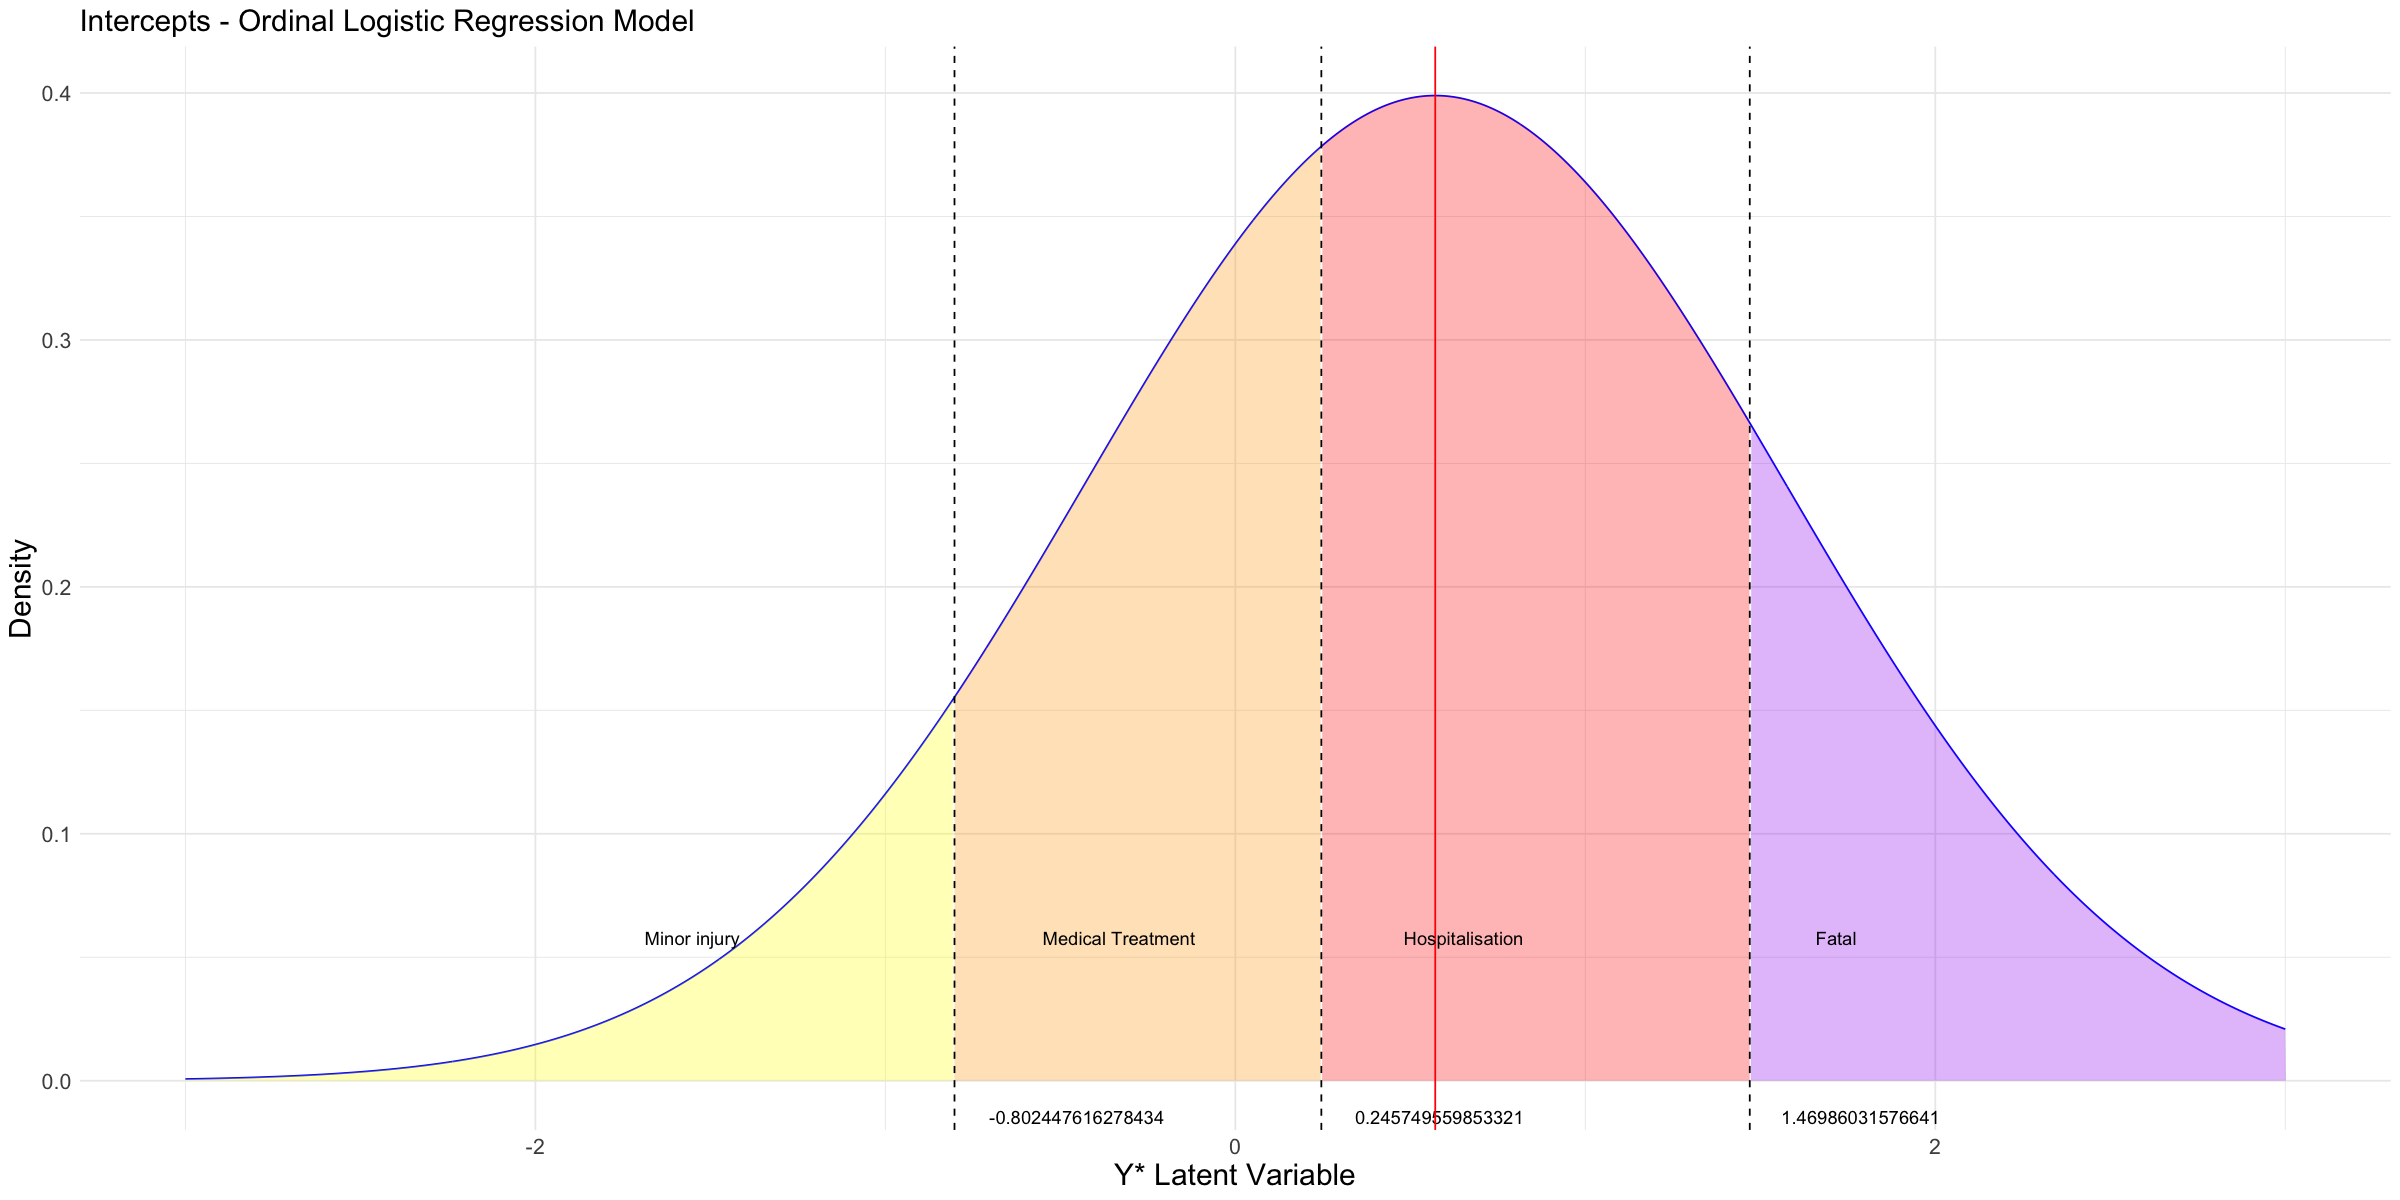

In [50]:
# Create a sequence of x-values from -3 to 3
x <- seq(-3, 3, length = 1000)

# Calculate the corresponding y-values for the bell curve
mean_value <- zi  # Centered at zero
sd_value <- 1     # Standard deviation

# Create a data frame for the bell curve
curve_data <- data.frame(x = x, y = dnorm(x, mean = mean_value, sd = sd_value))
labels <- data.frame(label = rownames(inter), values = inter$intercepts)

# fill range
fill_range <- inter

# Create a data frame for the fill area
fill_minor <- curve_data[curve_data$x <= fill_range[1, ], ]


fill_med <- curve_data[curve_data$x >= fill_range[1, ] & 
                        curve_data$x <= fill_range[2, ], ]


fill_hosp <- curve_data[curve_data$x >= fill_range[2, ] & 
                        curve_data$x <= fill_range[3, ], ]

fill_fatal <- curve_data[curve_data$x >= fill_range[3, ], ]

# Plot the bell curve
ggplot(data = curve_data, aes(x = x, y = y)) +
  geom_line(color = "blue") +
   
    theme_minimal() +
    theme(
        text = element_text(size = 16),  # Increase the overall text size
        plot.title = element_text(size = 18),  # Increase the title font size
        axis.title.x = element_text(size = 18),  # Increase the x-axis label font size
        axis.title.y = element_text(size = 18)  # Increase the y-axis label font size
    ) +
    # Fill the area between the two intercepts
    geom_area(data = fill_minor, aes(x = x, y = y), fill = "yellow", alpha = 0.3) +
    # Fill the area between the two intercepts
    geom_area(data = fill_med, aes(x = x, y = y), fill = "orange", alpha = 0.3) +
    # Fill the area between the two intercepts
    geom_area(data = fill_hosp, aes(x = x, y = y), fill = "red", alpha = 0.3) +
    # Fill the area between the two intercepts
    geom_area(data = fill_fatal, aes(x = x, y = y), fill = "purple", alpha = 0.3) +

    # Add vertical lines for the intercepts
    geom_vline(data = inter, aes(xintercept = intercepts), linetype = "dashed") +

    # Add intercept labels
    geom_text(data = labels, aes(x = values, y = 0.1, label = values), hjust = -0.2, vjust = 22) +

    # Add line for Y*
    # Add a vertical line based on the specified x-coordinate
    geom_vline(xintercept = mean_value, color = "red") +

     geom_text(data = data.frame(x = -1.85, y = 0.002, label = "Minor injury"), aes(x = x, y = y, label = label), hjust = -0.6, vjust = -10) +
    geom_text(data = data.frame(x = -0.55, y = 0.002, label = "Medical Treatment"), aes(x = x, y = y, label = label), hjust = 0, vjust = -10) +
    geom_text(data = data.frame(x = 0.55, y = 0.002, label = "Hospitalisation"), aes(x = x, y = y, label = label), hjust = 0.2, vjust = -10) +
    geom_text(data = data.frame(x = 1.6, y = 0.002, label = "Fatal"), aes(x = x, y = y, label = label), hjust = -0.5, vjust = -10) +

    labs(x = "Y* Latent Variable", y = "Density", title = "Intercepts - Ordinal Logistic Regression Model")

### Odds Ratio

In [51]:
## store coefficents table
ctable <- coef(summary(mpolr, digits = 3))


Re-fitting to get Hessian




In [52]:
p <- pnorm(abs(ctable[, "t value"]), lower.tail = FALSE) * 2

## combined table
ctable <- cbind(ctable, "p value" = p)

# Odds Ratio
odds_ratio <- exp(ctable[, "Value"])

ctable <- cbind(ctable, "odds_ratio" = odds_ratio)

ctable

,Value,Std. Error,t value,p value,odds_ratio
sp_limit,0.008369325,0.001683569,4.9711792,6.654690e-07,1.0084044
atmosphericFog,-0.132914223,0.293466282,-0.4529114,6.506125e-01,0.8755402
atmosphericRaining,-0.024328754,0.136028826,-0.1788500,8.580555e-01,0.9759648
atmosphericSmoke/Dust,-0.154476014,0.459188883,-0.3364106,7.365612e-01,0.8568640
lightingDarkness/Not lighted,0.386549702,0.139553771,2.7698979,5.607386e-03,1.4718936
lightingDawn/Dusk,-0.098364230,0.122935464,-0.8001290,4.236361e-01,0.9063187
lightingDaylight,-0.305808245,0.101862863,-3.0021564,2.680744e-03,0.7365278
road_surfaceUnsealed,0.467314457,0.142043427,3.2899407,1.002085e-03,1.5957031
road_conditionWet,-0.145614897,0.118275237,-1.2311529,2.182657e-01,0.8644906
Minor injury|Medical treatment,-0.802447616,0.147510615,-5.4399313,5.330111e-08,0.4482305


In [53]:
# Extract the coefficients and p-values
odds_ratio <- as.data.frame(ctable)[1:9, 5]

# Create a data frame for plotting
plot_data <- data.frame(
  Predictor = rownames(as.data.frame(ctable))[1:9],
  OR = odds_ratio
)

plot_data

Predictor,OR
<chr>,<dbl>
sp_limit,1.0084044
atmosphericFog,0.8755402
atmosphericRaining,0.9759648
atmosphericSmoke/Dust,0.8568640
lightingDarkness/Not lighted,1.4718936
lightingDawn/Dusk,0.9063187
lightingDaylight,0.7365278
road_surfaceUnsealed,1.5957031
road_conditionWet,0.8644906


Interpreting Odds Ratio


Driving on an Unsealed road have 60% greater odds of a more severe Crash compared to Sealed, ceteris paribus

The odds of a more severe crash when driving on a Wet road is 15% lower than when driving on a Dry road, ceteris paribus.

Darkness/Not lighted has 47% higher odds of a more severe crash compare to Darkness/Lighted, ceteris paribus

If the Speed Limit increases by 1 Km/h, the odds of having a more severe crash increases by 0.8%, ceteris paribus

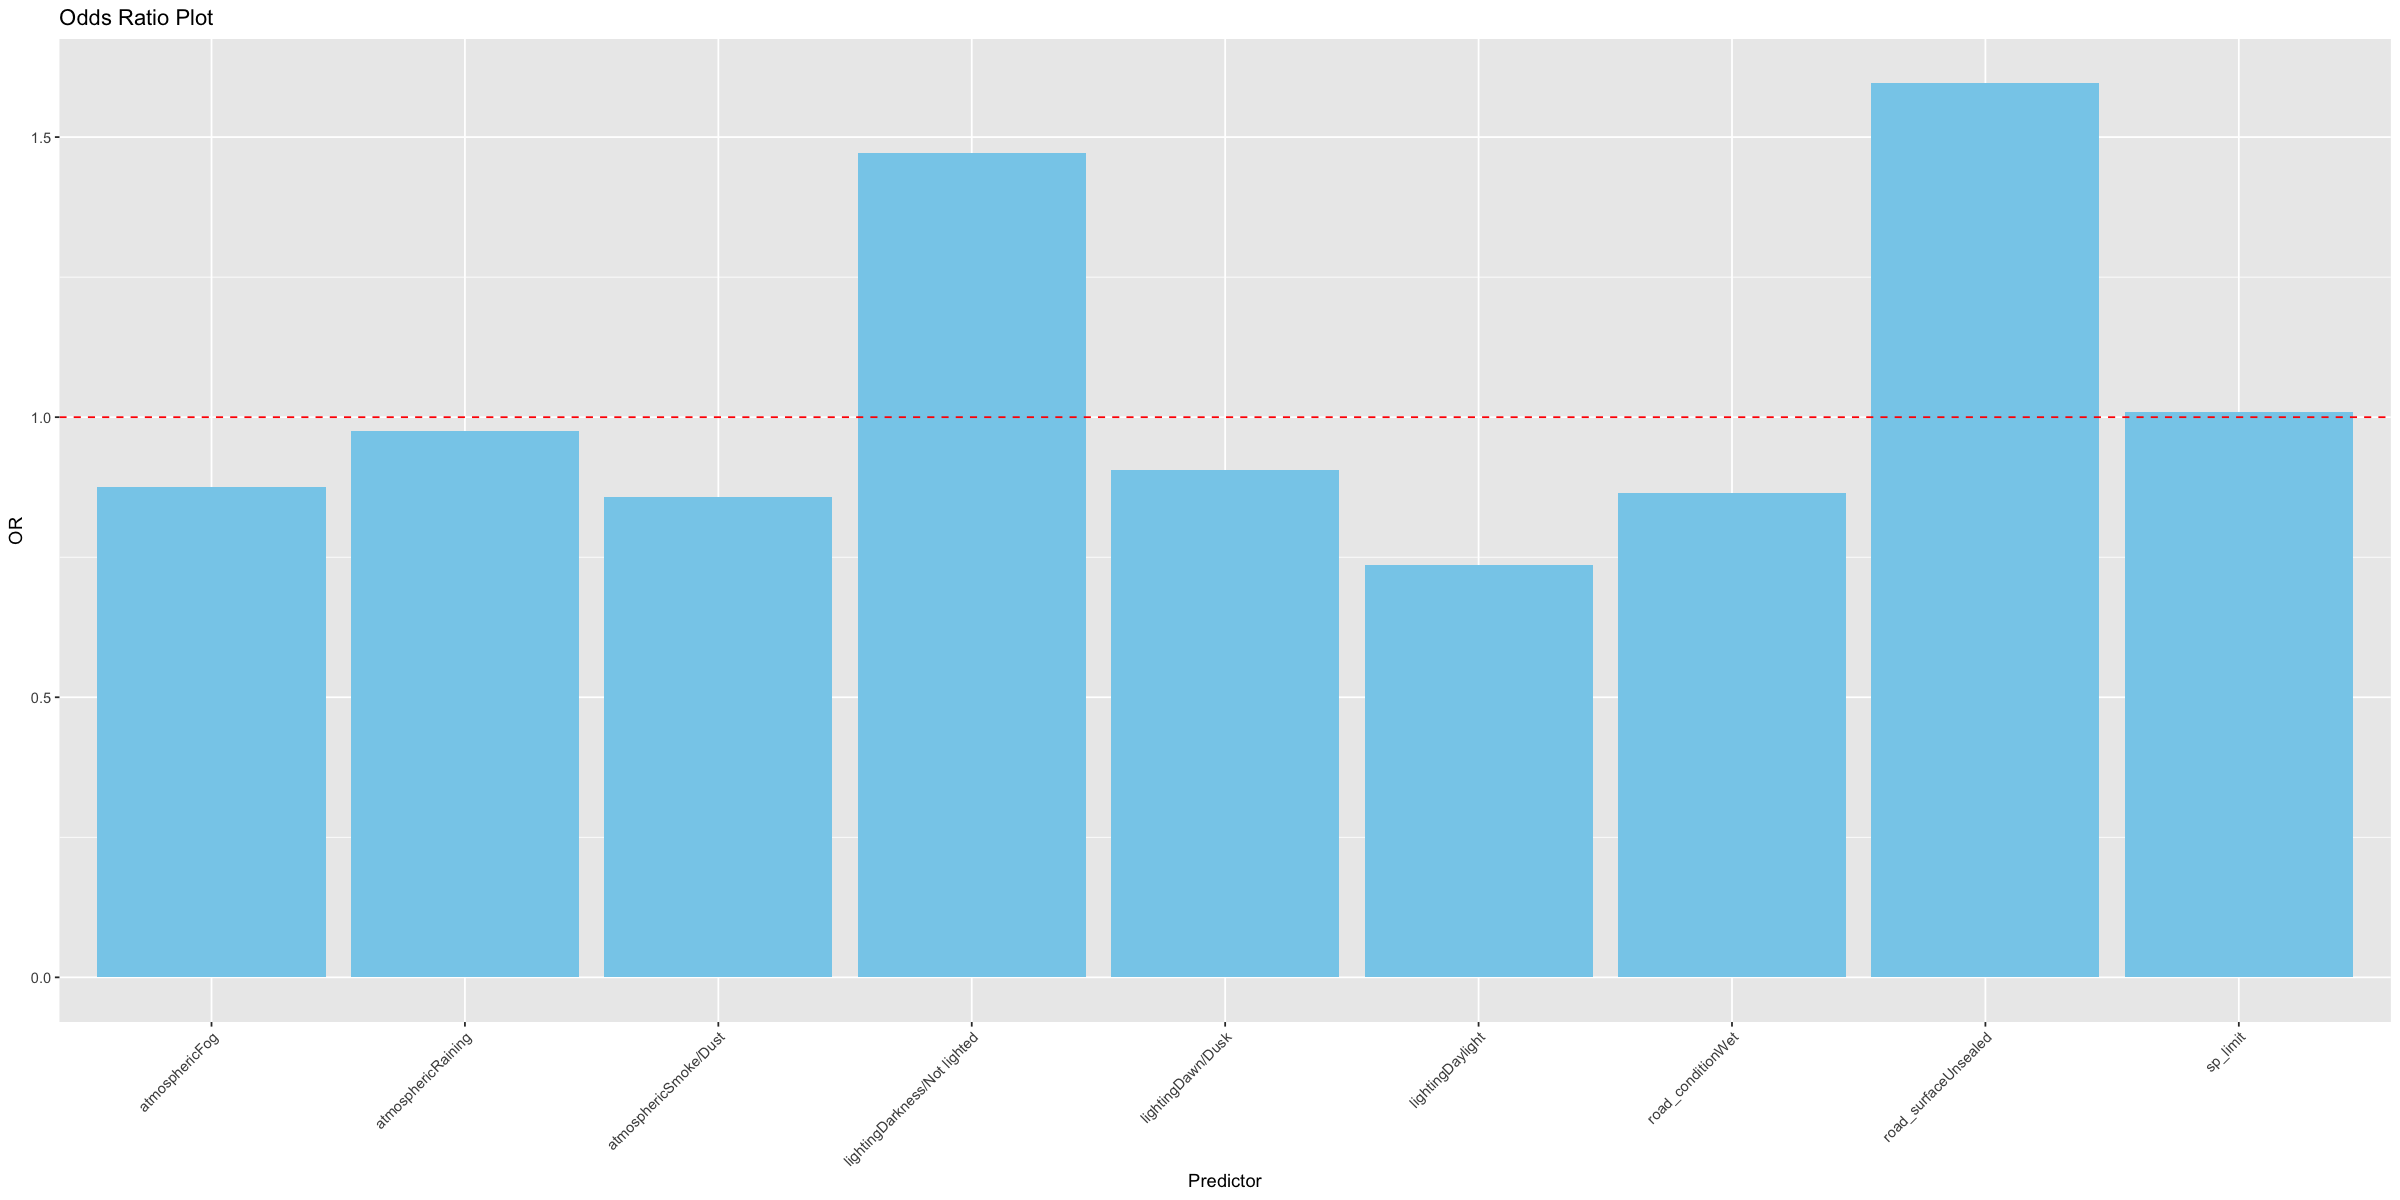

In [54]:
# Create a odds ratio plot
or_plot <- ggplot(plot_data, aes(x = Predictor, y = OR)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  geom_hline(yintercept = 1, linetype = "dashed", color = "red") +
  labs(title = "Odds Ratio Plot") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate x-axis labels for readability

print(or_plot)
options(repr.plot.width=5, repr.plot.height=5)
ggsave("or_plot.png", plot = or_plot, width = 10, height = 6)

### Marginal Effects

In [55]:
ologit_a <- oglmx::logit.reg(severity ~ sp_limit
             + atmospheric
             + lighting
             + road_surface
             + road_condition, data=train)

Warning message in model.response(mf, "numeric"):
“using type = "numeric" with a factor response will be ignored”


In [56]:
options(scipen=999)
oglmx::margins.oglmx(ologit_a, AME=TRUE)

Marginal Effects on Pr(Outcome==Minor injury)
                               Marg. Eff  Std. error t value     Pr(>|t|)    
atmosphericFog                0.02382134  0.05426862  0.4390    0.6606960    
atmosphericRaining            0.00424130  0.02376510  0.1785    0.8583559    
atmosphericSmoke/Dust         0.02782239  0.08586883  0.3240    0.7459302    
lightingDarkness/Not lighted -0.06159421  0.02033811 -3.0285    0.0024576 ** 
lightingDawn/Dusk             0.01732925  0.02199895  0.7877    0.4308541    
lightingDaylight              0.05246752  0.01727546  3.0371    0.0023886 ** 
road_surfaceUnsealed         -0.07230213  0.01939829 -3.7272    0.0001936 ***
road_conditionWet             0.02564357  0.02116181  1.2118    0.2255945    
sp_limit                     -0.00145068  0.00029162 -4.9746 0.0000006538 ***
------------------------------------ 
Marginal Effects on Pr(Outcome==Medical treatment)
                               Marg. Eff  Std. error t value     Pr(>|t|)    
atmosph

#### Marginal Effects Interpretation

Unsealed, Darkness/Not lighted and Crash_Speed_Limit increase the probability of having a Fatal crash

Driving on a Wet road reduces the probability of having a Fatal crash by 3% compared to Dry road, ceteris paribus

Driving in Daylight, reduces the probability of having a Fatal crash by 7% compared to Darkness/Lighted , ceteris paribus

Driving on an Unsealed road, increases the probability of having a Fatal crash by 7% compared to Sealed road, ceteris paribus

Driving in the Darkness/ Not lighted increases the probability of having a Fatal crash by 8% compared to Darkness/Lighted, ceteris paribus

When the Speed Limit increases by 1Km/h, The probability of having a Fatal Crash is increased by 0.2%, ceteris paribus.

### Performance Evaluation

In [60]:
length(mpolr$coefficients)

[1] 9

In [61]:
test[2, ]

,sp_limit,atmospheric,lighting,road_surface,road_condition,severity
,<int>,<fct>,<fct>,<fct>,<fct>,<ord>
1173,60,Raining,Daylight,Sealed,Wet,Hospitalisation


In [62]:
round(predict(mpolr,test[2, ],type = "p"), 3)

Minor injury Medical treatment   Hospitalisation             Fatal 
            0.304             0.251             0.254             0.191

In [63]:
test[69, ]

,sp_limit,atmospheric,lighting,road_surface,road_condition,severity
,<int>,<fct>,<fct>,<fct>,<fct>,<ord>
2342,60,Clear,Daylight,Sealed,Wet,Medical treatment


In [64]:
round(predict(mpolr,test[69, ],type = "p"), 3)

Minor injury Medical treatment   Hospitalisation             Fatal 
            0.299             0.250             0.257             0.195

In [65]:
nrow(test)

[1] 683

In [66]:
test[c(345:350), ]

,sp_limit,atmospheric,lighting,road_surface,road_condition,severity
,<int>,<fct>,<fct>,<fct>,<fct>,<ord>
2844,80,Raining,Darkness/Lighted,Sealed,Wet,Minor injury
2558,110,Clear,Daylight,Sealed,Wet,Medical treatment
3007,110,Clear,Dawn/Dusk,Sealed,Dry,Minor injury
2504,60,Clear,Daylight,Sealed,Dry,Medical treatment
335,50,Clear,Daylight,Sealed,Dry,Fatal
3158,110,Clear,Daylight,Unsealed,Dry,Minor injury


In [67]:
round(predict(mpolr,test[c(345:350), ],type = "p"), 3)

,Minor injury,Medical treatment,Hospitalisation,Fatal
2844,0.214,0.223,0.288,0.275
2558,0.219,0.225,0.287,0.269
3007,0.165,0.195,0.297,0.344
2504,0.269,0.243,0.269,0.219
335,0.286,0.247,0.262,0.205
3158,0.132,0.170,0.293,0.404


In [68]:
table(test$severity) / nrow(test)


     Minor injury Medical treatment   Hospitalisation             Fatal 
        0.2225476         0.2547584         0.2327965         0.2898975 

In [69]:
convert <- function(x) {
        if (x == 1) {
            y <-'Minor injury'            
        } else if (x == 2) {
            y <-'Medical treatment'
        } else if (x == 3) {
            y <-'Hospitalisation'
        } else {
            y <-'Fatal'
        }
    return(y)
}

In [70]:
expected_values <- test$severity
predicted_values <- argmax(as.data.frame(round(predict(mpolr,test,type = "p"), 3)))
predicted_values <- apply(as.data.frame(predicted_values), 1, convert)

In [71]:
predicted_values <- factor(predicted_values, ordered = TRUE,
                           levels = c("Minor injury",
                                      "Medical treatment",
                                      "Hospitalisation",
                                      "Fatal"))

cm <- confusionMatrix(data=predicted_values, reference = expected_values)

cm

Confusion Matrix and Statistics

                   Reference
Prediction          Minor injury Medical treatment Hospitalisation Fatal
  Minor injury                59                66              52    41
  Medical treatment            0                 0               0     0
  Hospitalisation             56                70              68    82
  Fatal                       37                38              39    75

Overall Statistics
                                             
               Accuracy : 0.2958             
                 95% CI : (0.2617, 0.3315)   
    No Information Rate : 0.2899             
    P-Value [Acc > NIR] : 0.3819             
                                             
                  Kappa : 0.0668             
                                             
 Mcnemar's Test P-Value : <0.0000000000000002

Statistics by Class:

                     Class: Minor injury Class: Medical treatment
Sensitivity                      0.38816          

### Plot probabilities

In [72]:
newdat <- cbind(test,predict(mpolr, test, type = "probs"))

head(newdat)

,sp_limit,atmospheric,lighting,road_surface,road_condition,severity,Minor injury,Medical treatment,Hospitalisation,Fatal
,<int>,<fct>,<fct>,<fct>,<fct>,<ord>,<dbl>,<dbl>,<dbl>,<dbl>
2470,80,Clear,Daylight,Unsealed,Dry,Medical treatment,0.1633515,0.1943619,0.2967706,0.3455160
1173,60,Raining,Daylight,Sealed,Wet,Hospitalisation,0.3038872,0.2507295,0.2543721,0.1910112
703,110,Clear,Daylight,Sealed,Dry,Fatal,0.1950907,0.2136756,0.2928577,0.2983761
1366,50,Raining,Daylight,Sealed,Wet,Hospitalisation,0.3218764,0.2533079,0.2464040,0.1784117
1602,80,Raining,Daylight,Sealed,Wet,Hospitalisation,0.2696810,0.2433050,0.2687935,0.2182206
38,110,Clear,Dawn/Dusk,Sealed,Dry,Fatal,0.1645564,0.1951791,0.2967336,0.3435308


In [73]:
lnewdat <- reshape::melt(newdat, id.vars = c("sp_limit",  "atmospheric", "lighting", "severity", "road_surface", "road_condition"),
  variable.name = "Level", value.name="Probability")
## view first few rows
head(lnewdat)

,sp_limit,atmospheric,lighting,severity,road_surface,road_condition,variable,value
,<int>,<fct>,<fct>,<ord>,<fct>,<fct>,<fct>,<dbl>
1,80,Clear,Daylight,Medical treatment,Unsealed,Dry,Minor injury,0.1633515
2,60,Raining,Daylight,Hospitalisation,Sealed,Wet,Minor injury,0.3038872
3,110,Clear,Daylight,Fatal,Sealed,Dry,Minor injury,0.1950907
4,50,Raining,Daylight,Hospitalisation,Sealed,Wet,Minor injury,0.3218764
5,80,Raining,Daylight,Hospitalisation,Sealed,Wet,Minor injury,0.2696810
6,110,Clear,Dawn/Dusk,Fatal,Sealed,Dry,Minor injury,0.1645564


`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


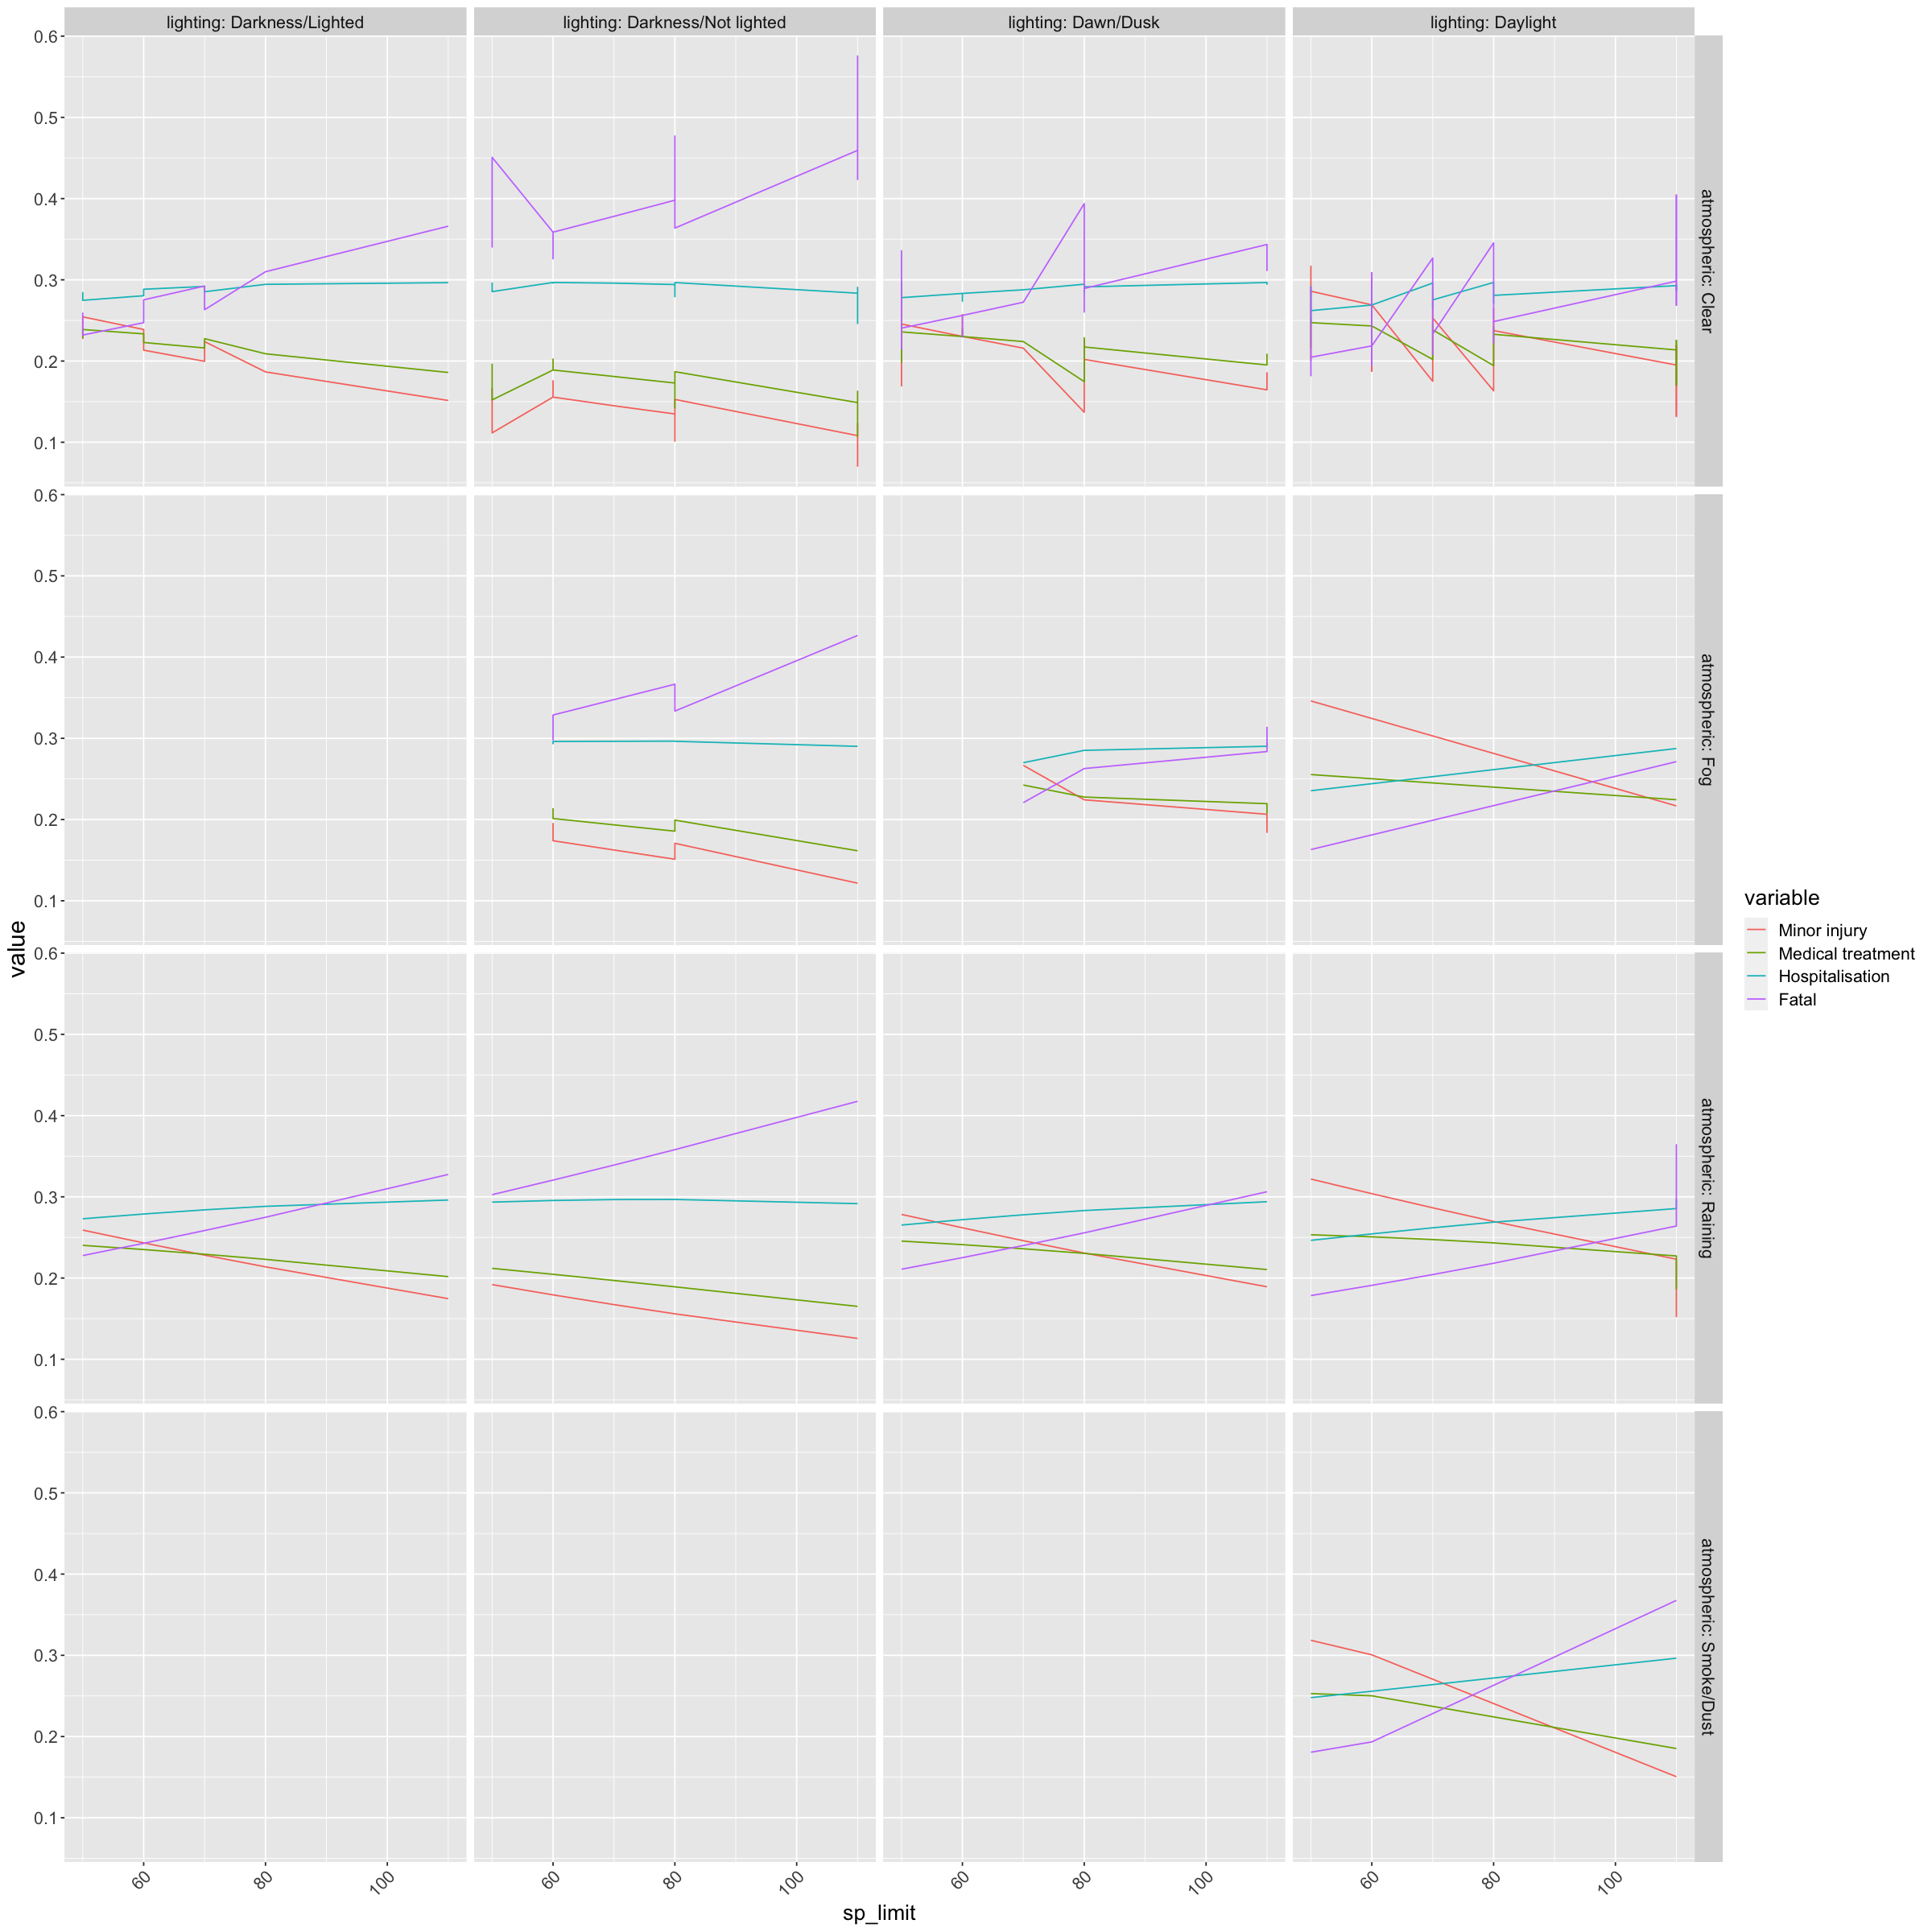

In [74]:
probs_plot <- ggplot(lnewdat, aes(x = sp_limit, y = value, colour = variable)) +
                theme(axis.text.x = element_text(angle = 45, hjust = 1),
                       text = element_text(size = 16),  # Increase the overall text size
                      plot.title = element_text(size = 18),  # Increase the title font size
                      axis.title.y = element_text(size = 18)) + # Increase the y-axis label font size)
              geom_line() + facet_grid(atmospheric ~ lighting, labeller="label_both")

options(repr.plot.width=20, repr.plot.height=20)
ggsave("probs_plot_bal.png", plot = probs_plot, width = 20, height = 20)
print(probs_plot)

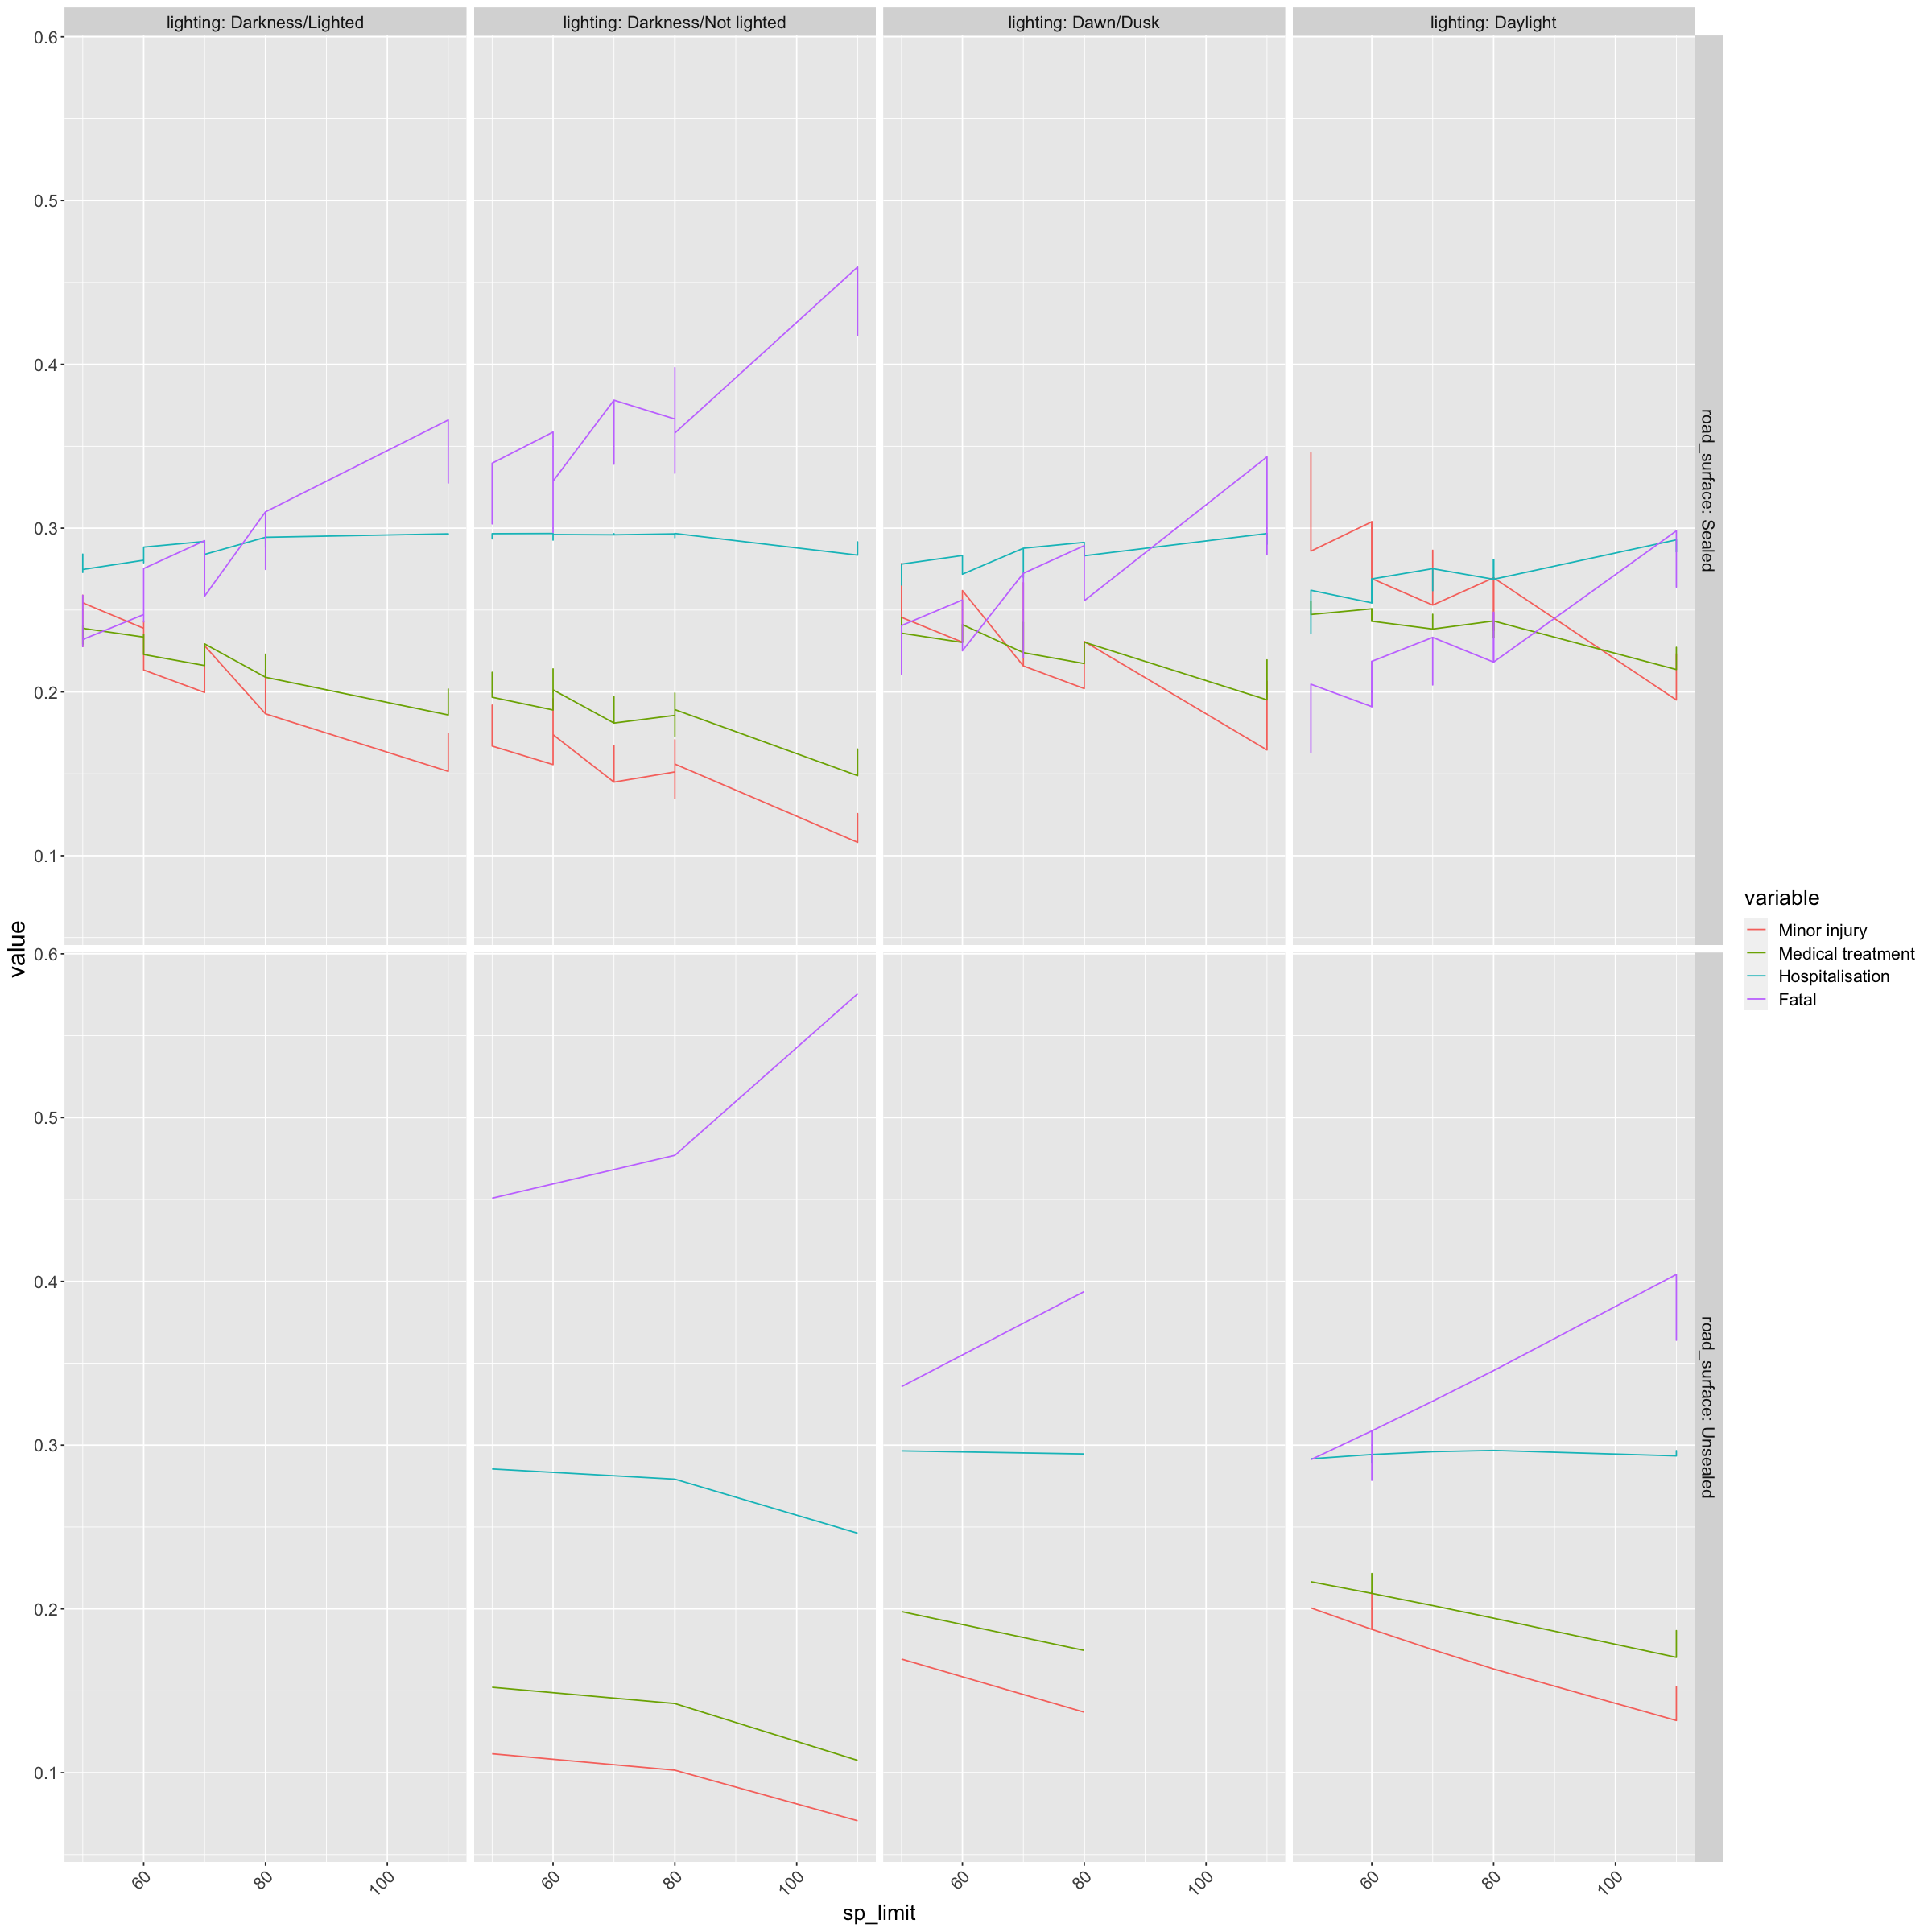

In [75]:
probs_plot <- ggplot(lnewdat, aes(x = sp_limit, y = value, colour = variable)) +
            theme(axis.text.x = element_text(angle = 45, hjust = 1),
                       text = element_text(size = 16),  # Increase the overall text size
                      plot.title = element_text(size = 18),  # Increase the title font size
                      axis.title.y = element_text(size = 18)) + # Increase the y-axis label font size)
              geom_line() + facet_grid(road_surface ~ lighting, labeller="label_both")

options(repr.plot.width=20, repr.plot.height=20)
ggsave("probs_plot_bal.png", plot = probs_plot, width = 20, height = 20)
print(probs_plot)

In [76]:
?polr

polr {MASS},R Documentation
formula,"a formula expression as for regression models, of the form response ~ predictors. The response should be a factor (preferably an ordered factor), which will be interpreted as an ordinal response, with levels ordered as in the factor. The model must have an intercept: attempts to remove one will lead to a warning and be ignored. An offset may be used. See the documentation of formula for other details."
data,"an optional data frame, list or environment in which to interpret the variables occurring in formula."
weights,optional case weights in fitting. Default to 1.
start,"initial values for the parameters. This is in the format c(coefficients, zeta): see the Values section."
...,"additional arguments to be passed to optim, most often a control argument."
subset,expression saying which subset of the rows of the data should be used in the fit. All observations are included by default.
na.action,a function to filter missing data.
contrasts,a list of contrasts to be used for some or all of the factors appearing as variables in the model formula.
Hess,logical for whether the Hessian (the observed information matrix) should be returned. Use this if you intend to call summary or vcov on the fit.
model,logical for whether the model matrix should be returned.
